from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

## Import FRETclass package

In [1]:
from FRET_class_5 import*
%load_ext autoreload
%autoreload 2
%matplotlib inline
params = {'legend.fontsize': 15,
          'figure.figsize': (15, 8),
         'axes.labelsize': 20,
         'axes.titlesize': 25,
         'xtick.labelsize':15,
         'ytick.labelsize':15,
         'lines.linewidth':2}
matplotlib.rcParams.update(params)

## Import Calibration File

In [2]:
calib_FN='CalibrationFiles/Calibration_npy_files/StandardCalibration_Cerulean-Venus_405-458_32ch_1-5-18_live.npy'

print(calib_FN)
Q1=int(raw_input('Is this the appropriate fluorophore calibration file? (y=1,n=0)'))
if Q1==0:
    calib_FN=raw_input('Input fluorophore calibration file path: ')

calib=np.load(calib_FN)

linker_calib_FN='CalibrationFiles/Linker_Calibrations/D40A.txt'
print(linker_calib_FN)
Q2=int(raw_input('Is this the appropriate linker calibration file? (y=1,n=0)'))
if Q2==0:
    calib_FN=raw_input('Input linker calibration file path: ')
    
linker_calib=np.genfromtxt(linker_calib_FN,delimiter=',')

CalibrationFiles/Calibration_npy_files/StandardCalibration_Cerulean-Venus_405-458_32ch_1-5-18_live.npy
Is this the appropriate fluorophore calibration file? (y=1,n=0)1
CalibrationFiles/Linker_Calibrations/D40A.txt
Is this the appropriate linker calibration file? (y=1,n=0)1


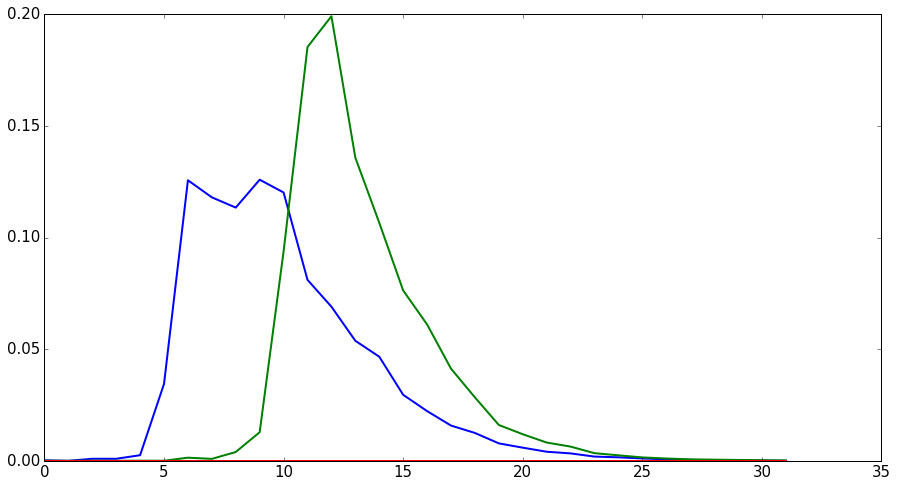

In [3]:
plot(calib[1].T)


In [4]:
Q3=int(raw_input('Fit with Autofluorescence components? (y=1,n=0)'))
if Q3==0:
    calib[0][2]=np.zeros([calib[0][0].shape[0]])
    calib[1][2]=np.zeros([calib[1][0].shape[0]])

Fit with Autofluorescence components? (y=1,n=0)0


## Initialize FRET Object

In [5]:
N=str(raw_input('What is the Experiment Name?: '))
Data=FRETcalc(N,calib,linker_calib)


What is the Experiment Name?: test1


## Read Image Data from Grouped_Tiffs directory

In [ ]:
Data.get_tif_container()


Number of Channels in Image and Calibration Do Not Match! Defaulting to Calibration Channels!



## Apply Gaussian Filter to Remove Spectral Noise

This depends on what your signal to noise is but for 500x500 to 800x800 a 1 pixel blur is a good starting point. If the FRET efficiency distributions are too wide or are not centered on the efficiency from the averaged spectra, you can try to increase the blurring to get more stable FRET efficiency values

In [7]:
b=int(raw_input('Gaussian Blur Pixel Radius: '))
Data.apply_gaussian_filter(b)


Gaussian Blur Pixel Radius: 1



## Register ex1 and ex2 images

This step shifts the lower frequency in the x and y dimensions so that it is aligned with the higher frequency, which can adjust for small movements of the stage between taking the two images. How much the images are shifted relative to one another is printed out so any large shifts (greater than ~5% of your image size) could indicate the algorithm used to align them is failing or your images are being read in wrong.

In [8]:
Data.register_images(to_F1=True)


('Y: 0.000', 'X: -1.000')
('Y: 1.000', 'X: 2.000')
('Y: 2.000', 'X: 1.000')
('Y: 1.000', 'X: 0.000')
('Y: 0.000', 'X: 0.000')
('Y: 0.000', 'X: 0.000')
('Y: 0.000', 'X: 1.000')
_____________
('Y: -2.000', 'X: 1.000')
('Y: 1.000', 'X: -1.000')
('Y: 0.000', 'X: 0.000')
('Y: 0.000', 'X: 0.000')
('Y: 0.000', 'X: 0.000')
('Y: 0.000', 'X: 1.000')
('Y: 0.000', 'X: 0.000')
_____________
('Y: 1.000', 'X: -1.000')
('Y: -4.000', 'X: 3.000')
('Y: 0.000', 'X: -1.000')
('Y: 1.000', 'X: 0.000')
_____________



## Sort Image Data

This step sorts only the masked pixels and labels each pixel spectra with which group, image, and region it is part of along with its x and y location. Since the masked regions are typically small compared to the whole image this greatly reduces the file size and memory usage because all of the pixels outside of the mask dont need to be saved.

In [9]:
Data.sort_tif_container()


Total Pixels: 18053
Total Regions: 20
Total Images: 18
Total Groups: 3



/Users/conway/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


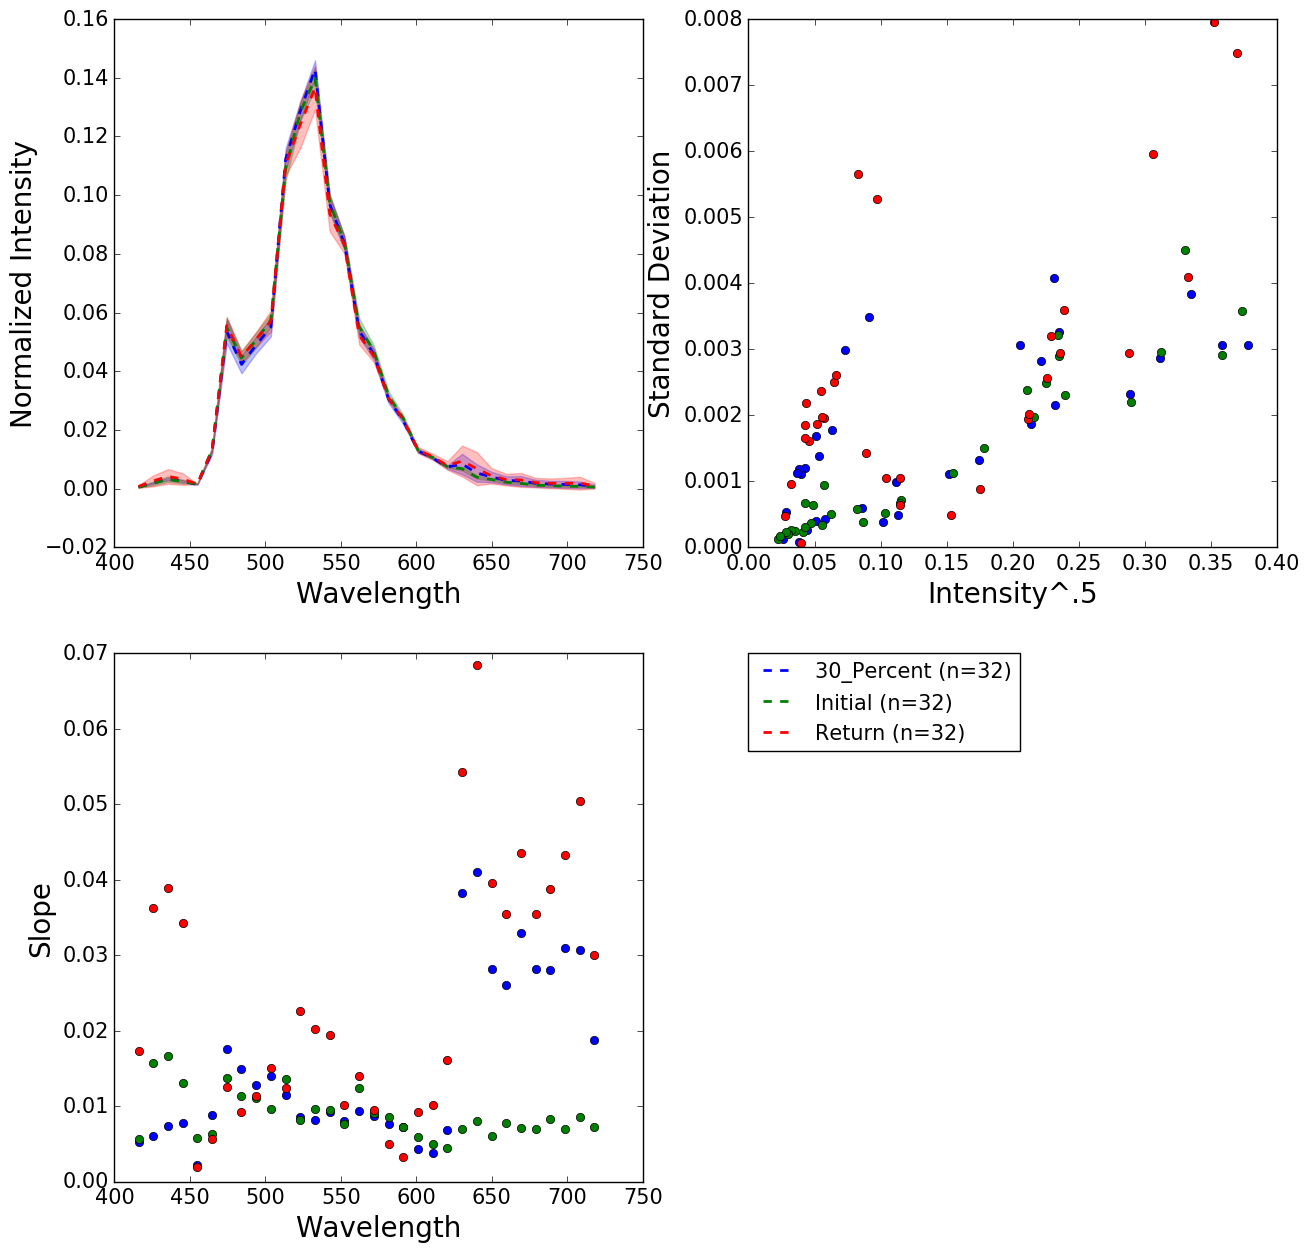

In [12]:
#Data.spectraVar(ex=1,observation='pixel',groups=[])
#Data.spectraVar_byimage(ex=1,observation='region',specify=[[0,1,2,3],[],[]])
Data.spectraVar_bygroup(ex=1,observation='region',specify=[[],[],[]])
#Data.spectraVar(ex=1,observation='image',groups=[])


## Calculate FRET efficiency for each group

This step is just to print out the overall FRET efficiencies for each group so if one of the groups is the zero force control you can use that value for the force calibration.

Data.comps1[2,:]=np.zeros(Data.comps1.shape[1])
Data.comps2[2,:]=np.zeros(Data.comps2.shape[1])

________________________________________________

30_Percent
FRET Efficiency: 0.579707077463
FRET Error: nan
Force (pN): nan
Number of Observations: 7
D1: 37757.5917916
D2: 19430.1215642
A1: 53843.8232496
A2: 66434.4182338
AF1: 0.0
AF2: 0.0
I1: 94056.6048357
I2: 86189.4716523
R1: 0.0173128337287
R2: 0.0235784268621
Alpha: 0.514601716958
Beta: 38554.8182037
A1dir: 6298.16475564
A2dir: 41795.8646006
Index1: 1.42603965705
Index2: 3.41914578426
Donor Ratio: 0.514601716958
Acceptor Ratio: 0.810480842326
Eff1(excess Acceptor): 0.578004507766
Eff2(excess Acceptor): 0.579707077463
Eff1(excess Donor): 0.331736221793
Eff2(excess Donor): 0.334061176469
Stoicheometry 1: 0.573933623934
Stoicheometry 2: 0.576258578611
Dex1: 144312.777554
Dex2: 74564.4384384
Aex1: 11049.411852
Aex2: 73326.0782467
________________________________________________
________________________________________________

Initial
FRET Efficiency: 0.568687740413
FRET Error: nan
Force (pN): nan
Number of Observations: 9
D1: 64716.

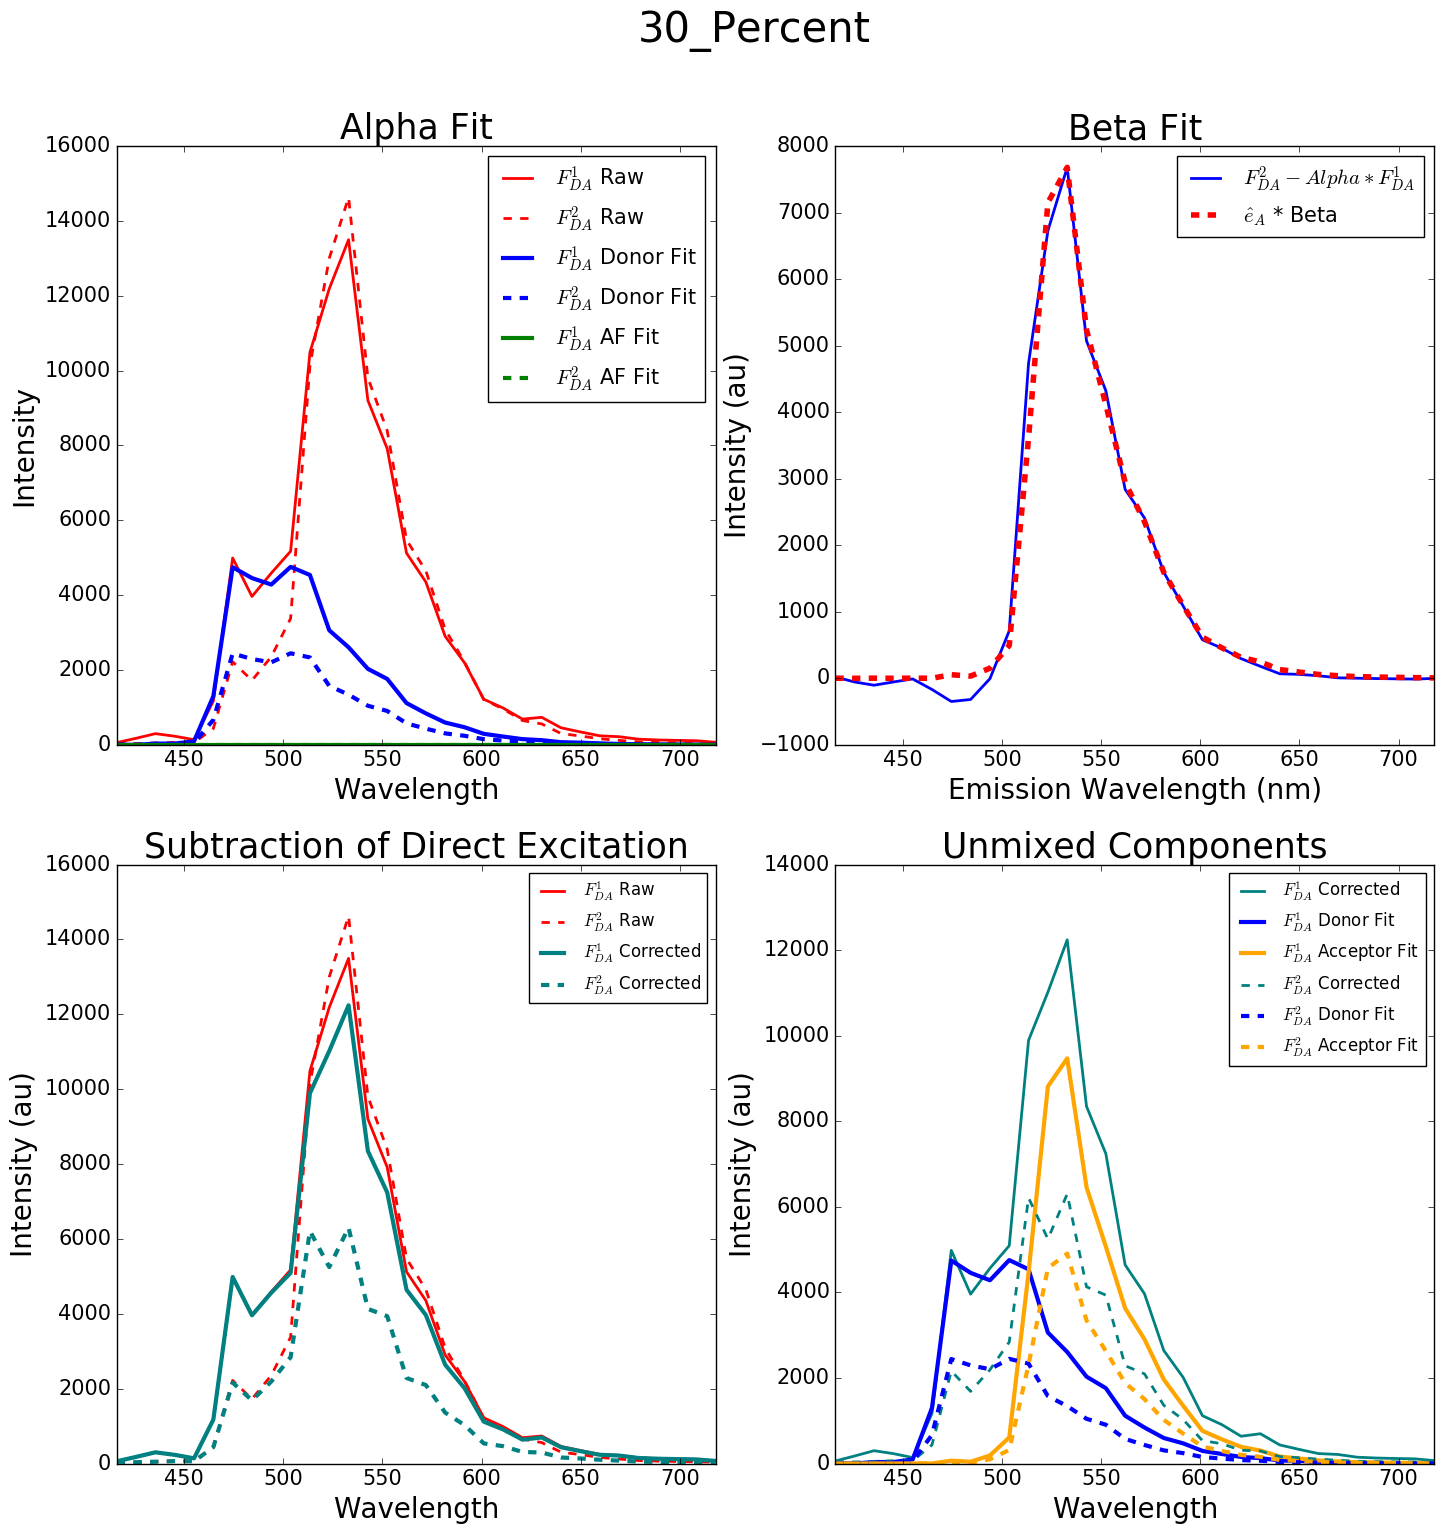

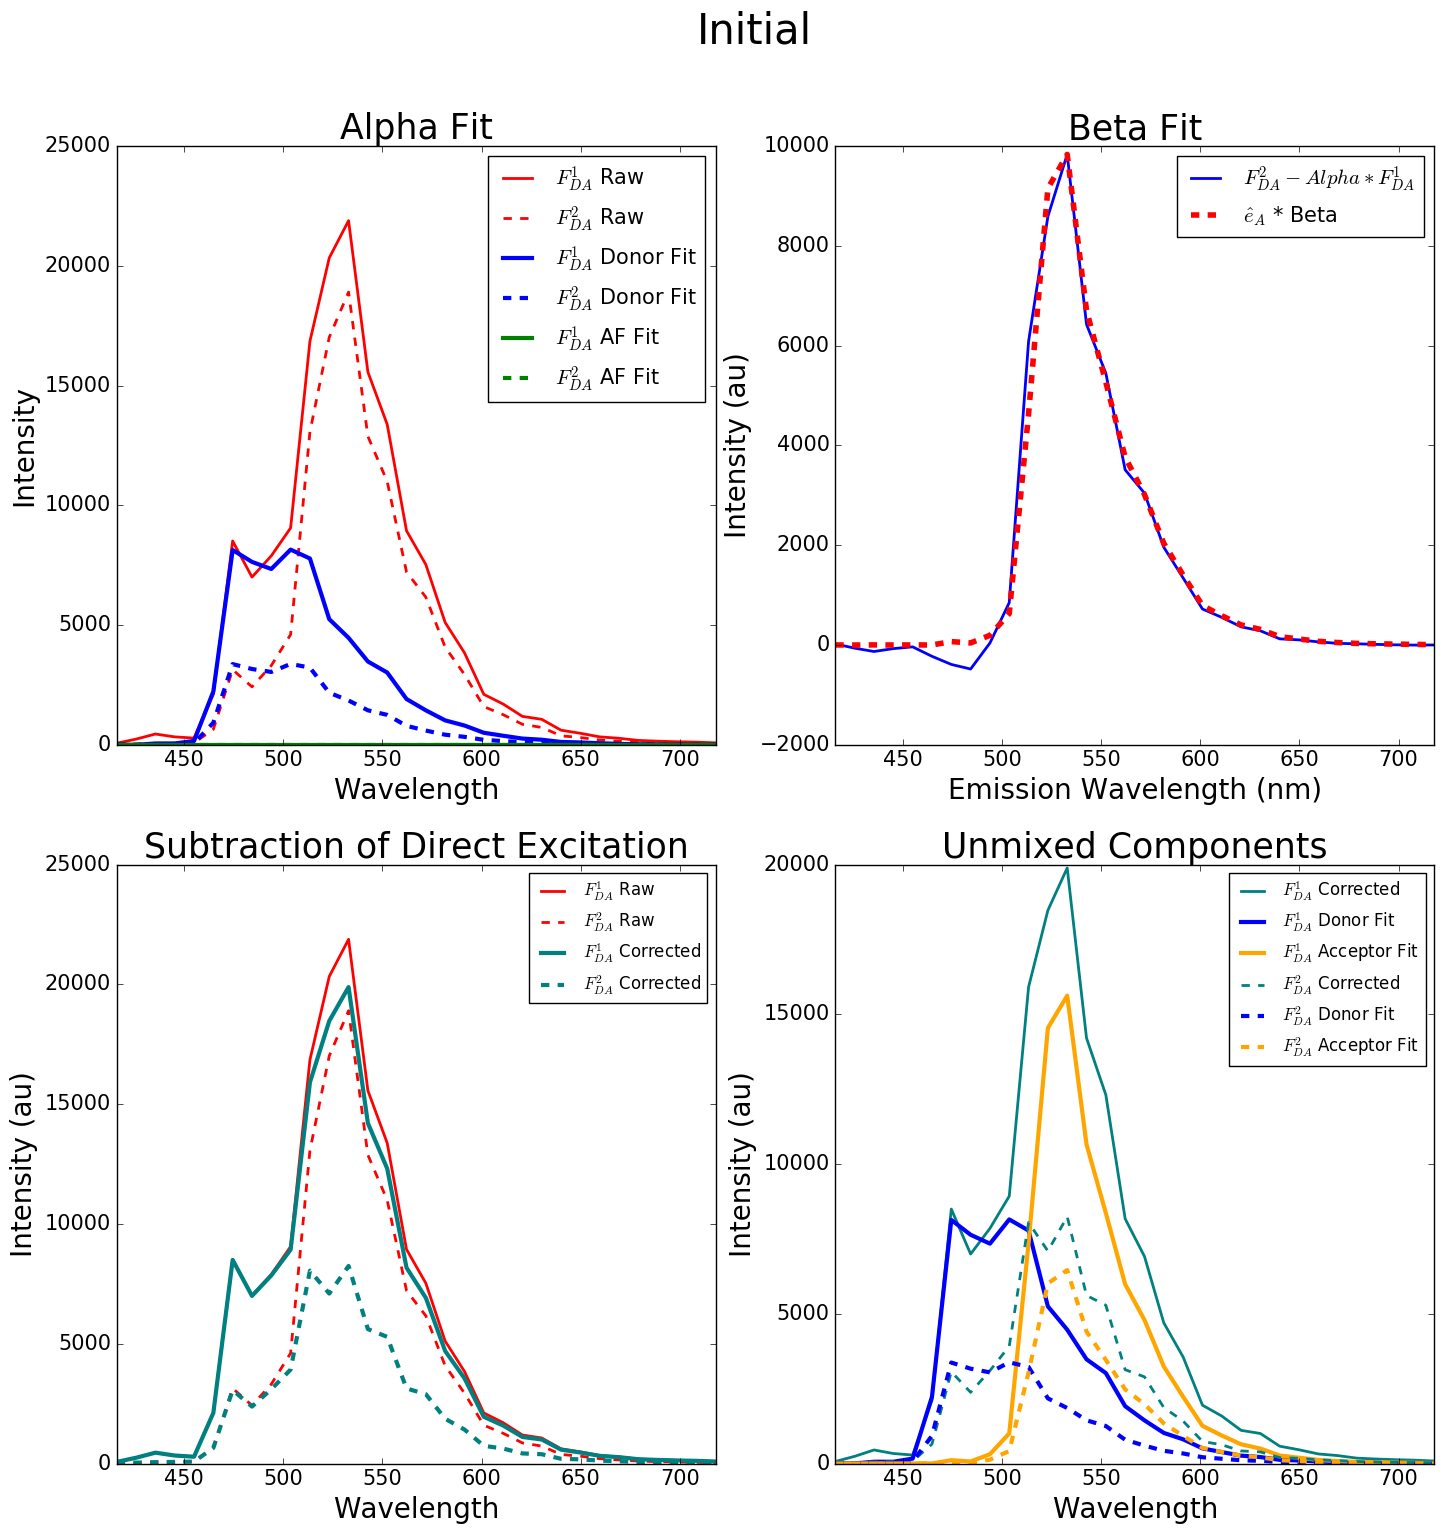

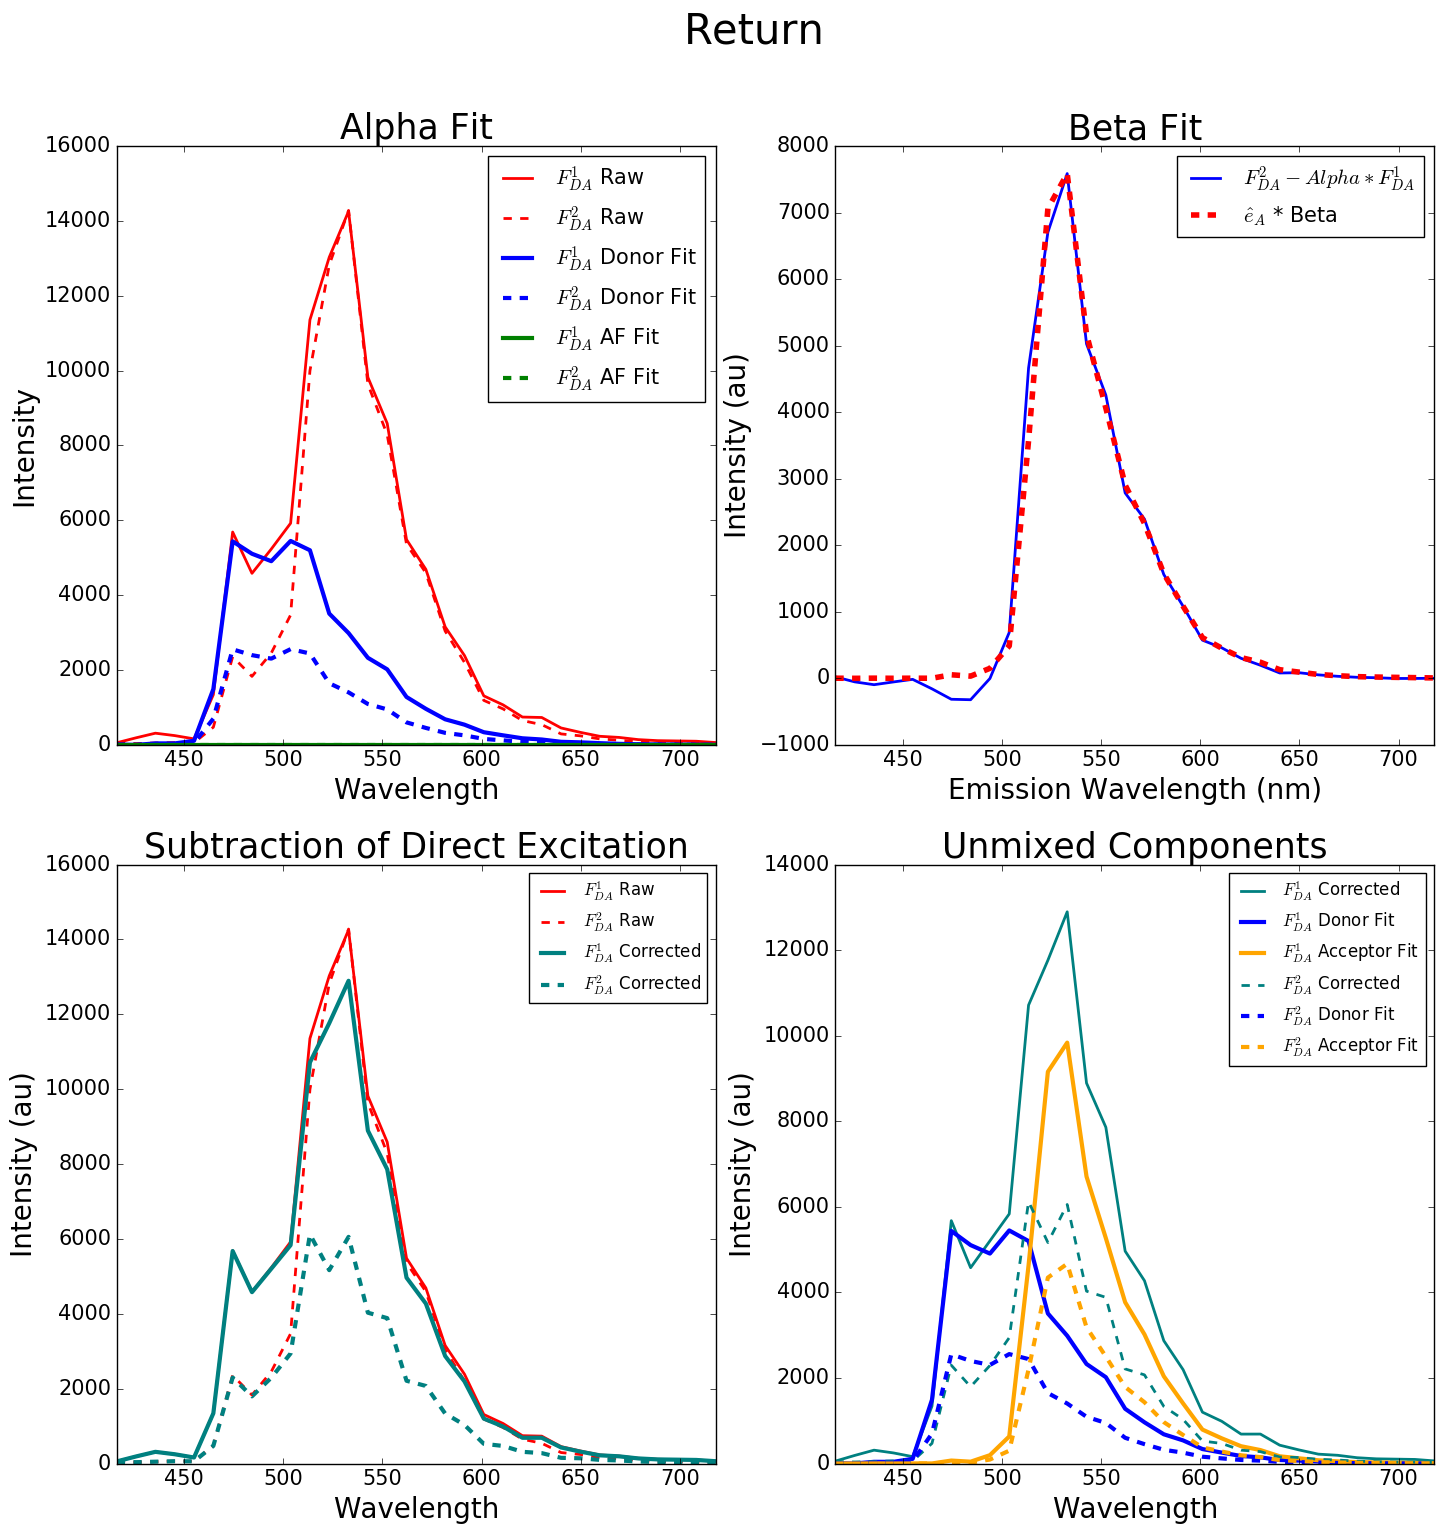

In [23]:
Data.calcE_bygroup(force=False,plot=True,verbose=True,observation="region",specify=[[],[],[]])


In [14]:
print (Data.param_ind)


{'Group': 0, 'Force (pN)': 26, 'Area': 5, 'Normalized Residual': 14, 'Relative Donor Extinction Coef.': 33, 'FRET Efficiency Error': 25, 'Acceptor Magnitude': 8, 'FRET Efficiency (excess Acceptor)': 27, 'Beta': 17, 'FRET Efficiency': 20, 'Alpha': 16, 'Stoicheometry': 31, 'Donor Magnitude': 6, 'FRET Efficiency (excess Donor)': 29, 'FRET Index': 21, 'Region': 2, 'Donor Ratio (D2/D1)': 23, 'Acceptor Ratio (A1/A2)': 24, 'Y': 4, 'X': 3, 'Acceptor Direct Excitation': 18, 'Image': 1, 'Autofluorescence Magnitude': 10, 'Intensity': 12, 'Relative Acceptor Extinction Coef.': 35}


In [15]:
print(Data.group_names)

['tile_position_00', 'tile_position_01024', 'tile_position_0512']


In [16]:
print(Data.gamma)

0.0775446668686


## Set Unloaded FRET Efficiency (from HL,TL,etc.)

This is set to correspond to the FRET efficiency of an unloaded data set. If you are not interested in the force measurement, set this to any value and ignore the force output.

In [18]:
Data.zeroForceEff=float(raw_input('What is the Unloaded FRET Efficiency? (between 0 and 1)'))


What is the Unloaded FRET Efficiency? (between 0 and 1).5


##### Calculate the FRET efficiency for each group, image, region, and pixel

All of the parameters are calculated for each type of observation(group,image,region,pixel) which can then be specified in most of the plotting functions

In [14]:
Data.calcFRET_container(calc_force=False)

## Spatial distribution of the FRET

Keyword Options:
'param' chooses which calculated value to plot (FRET Efficiency, Force (pN), FRET Efficiency Error, etc.)
'mn' and 'mx' sets the colorbar range
'anotate' prints the region values over each region
'specify' lets you choose which groups,images, and regions are plotted (defaults to all, format:[[groups],[images],[regions]])

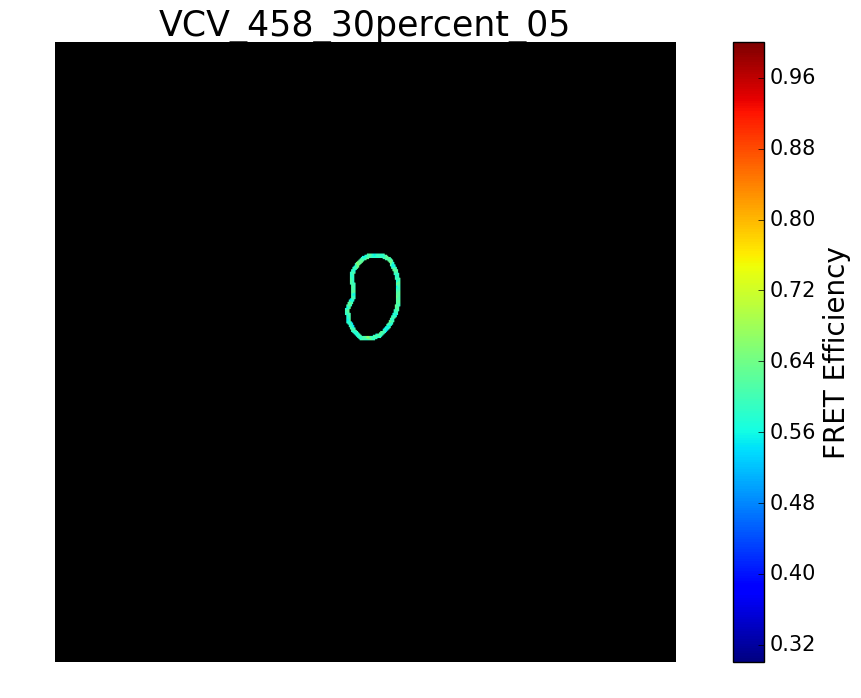

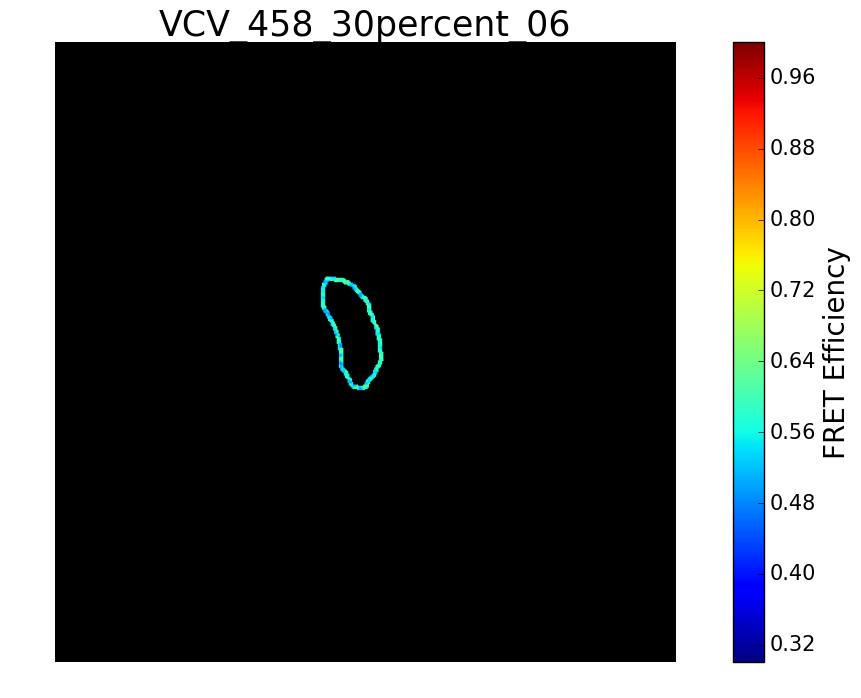

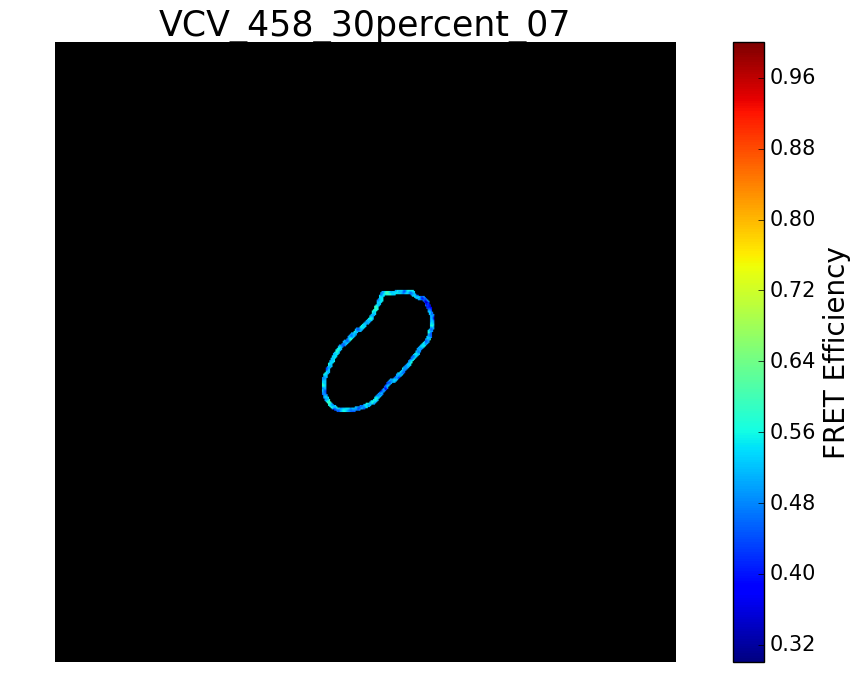

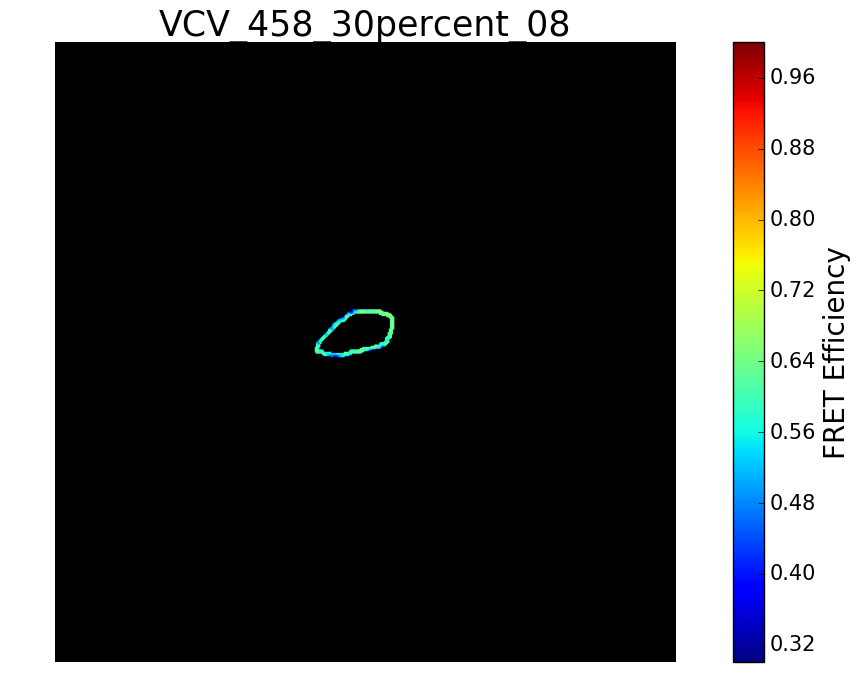

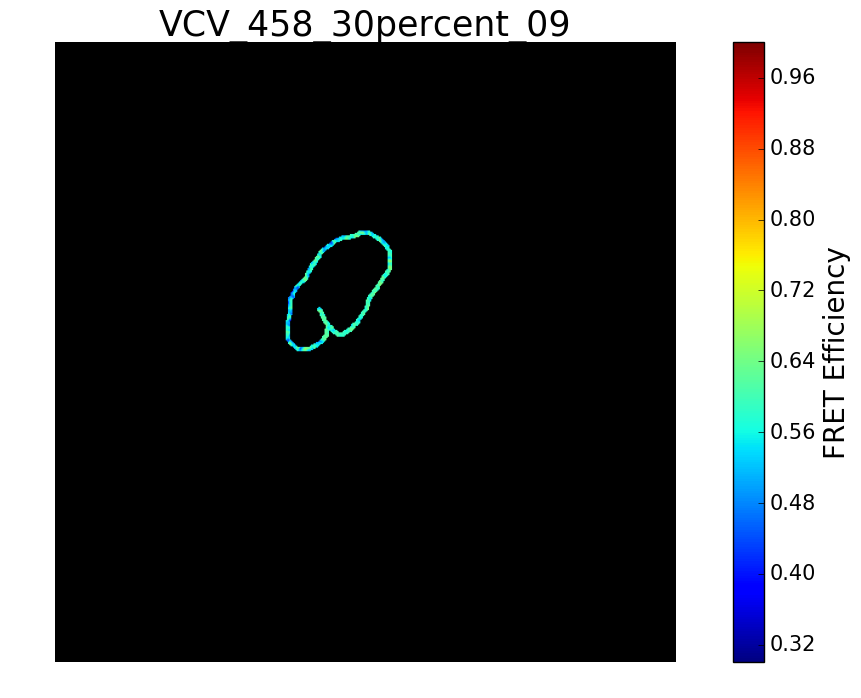

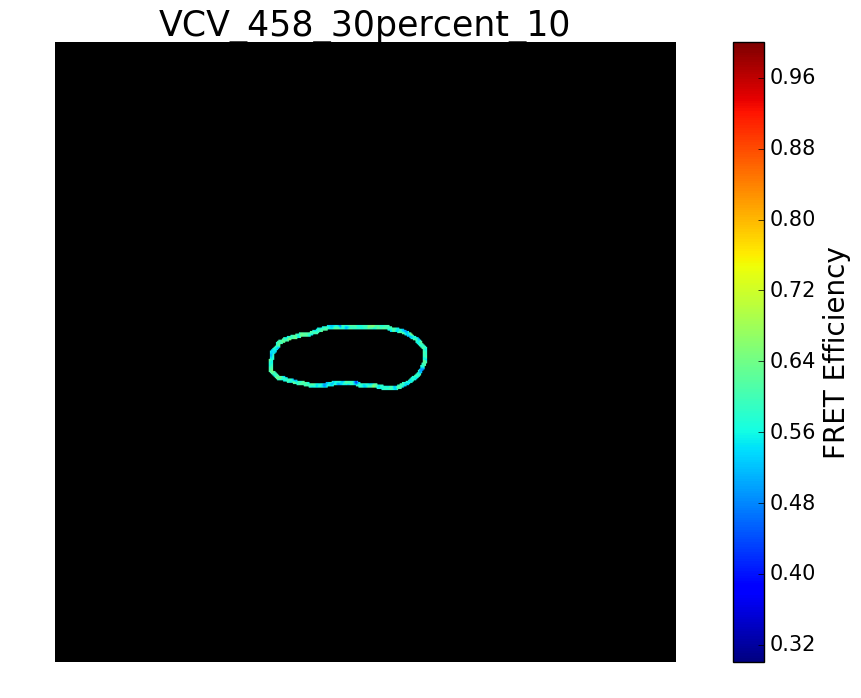

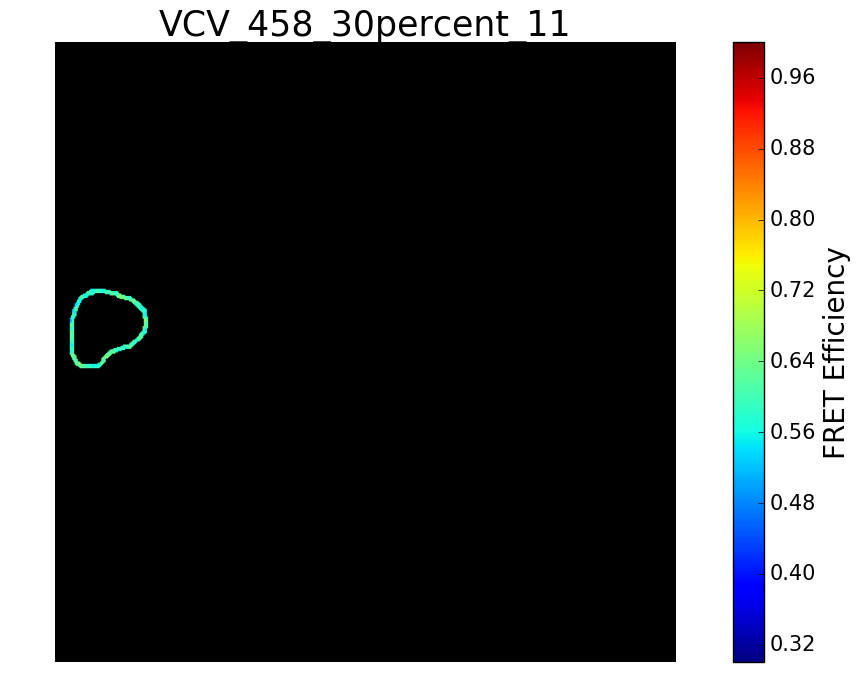

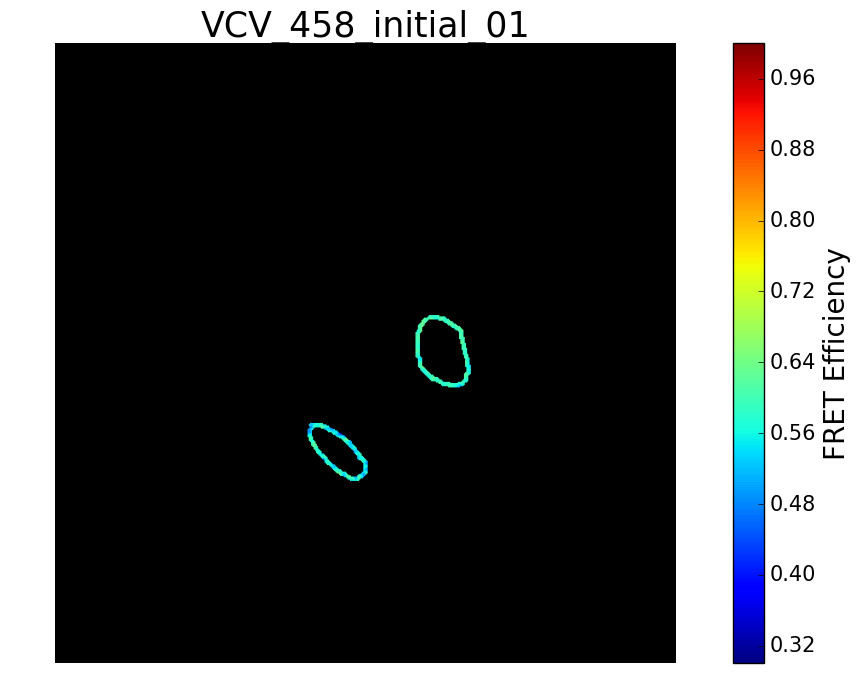

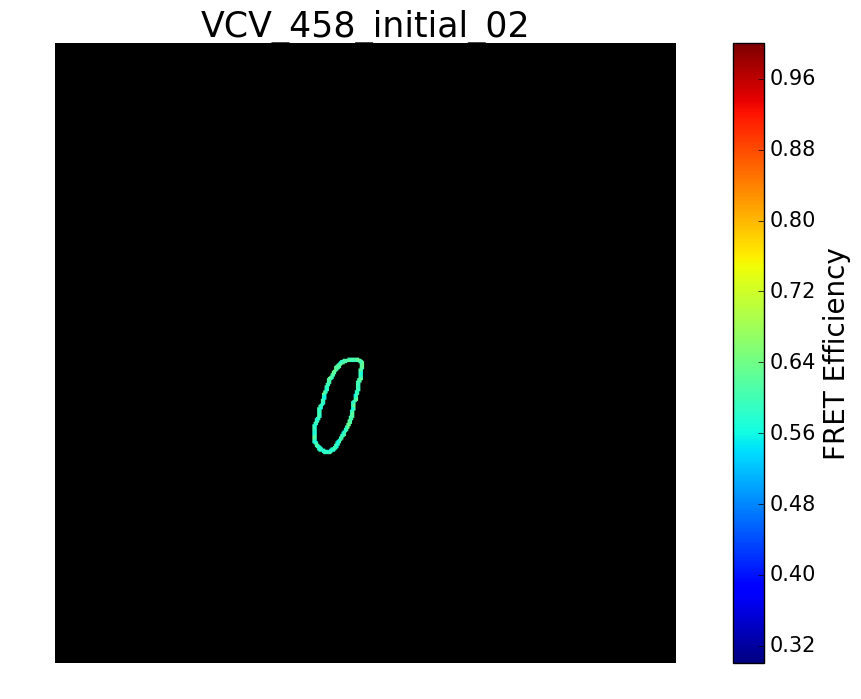

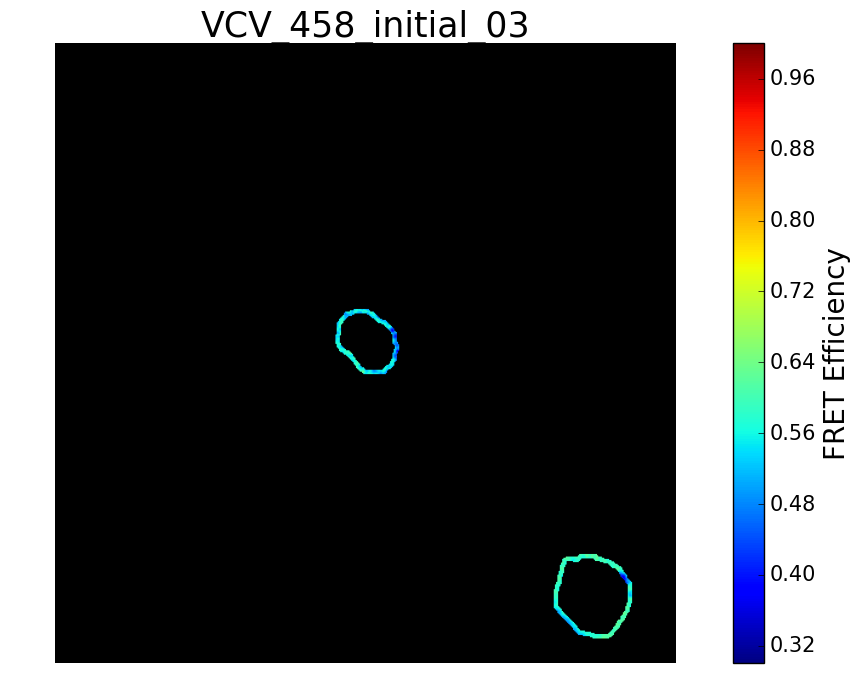

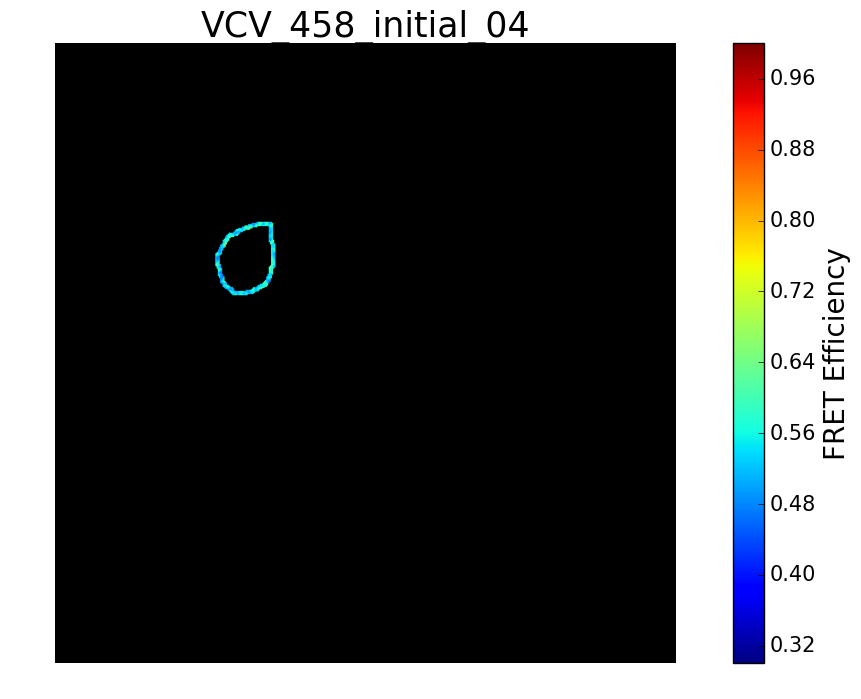

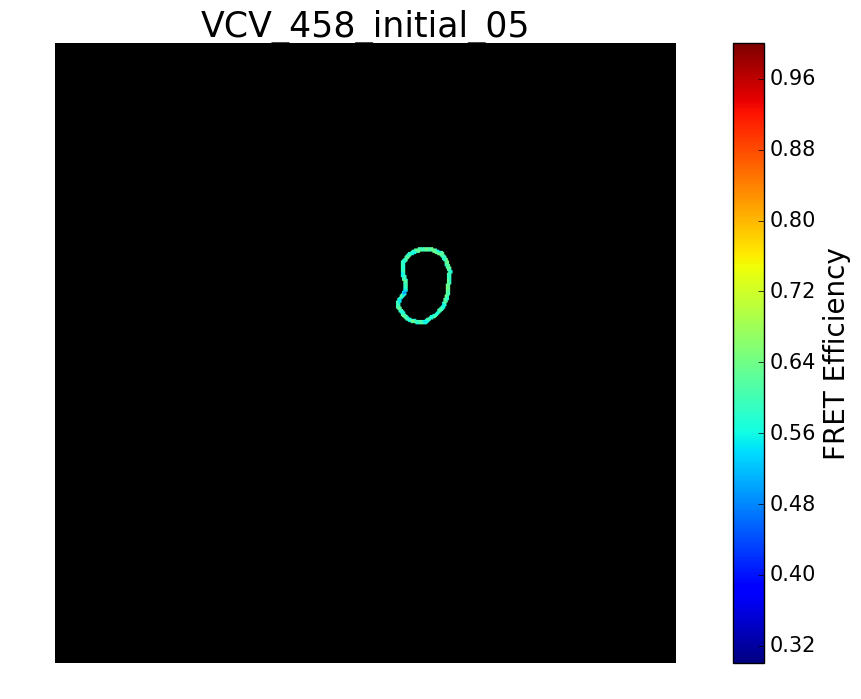

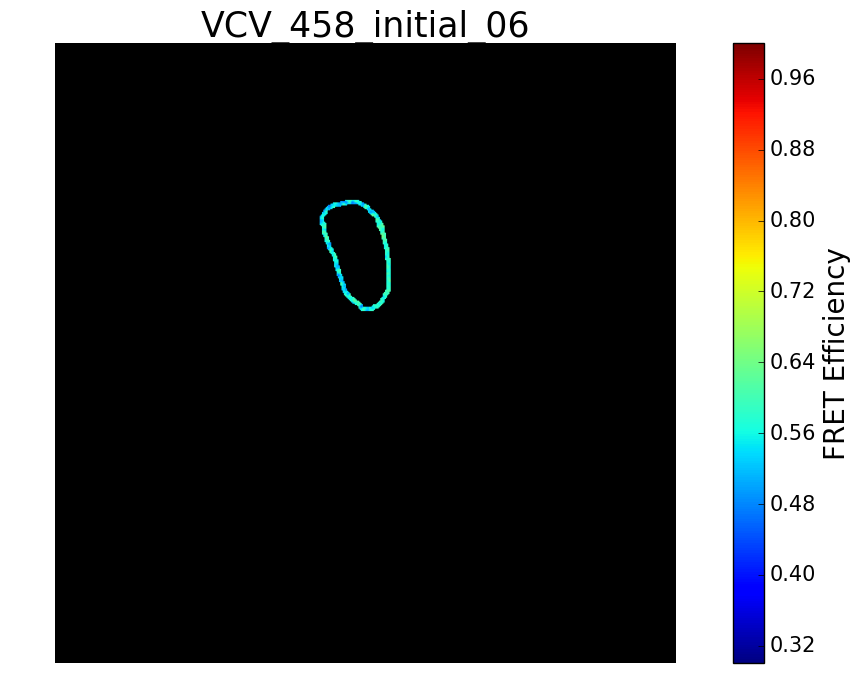

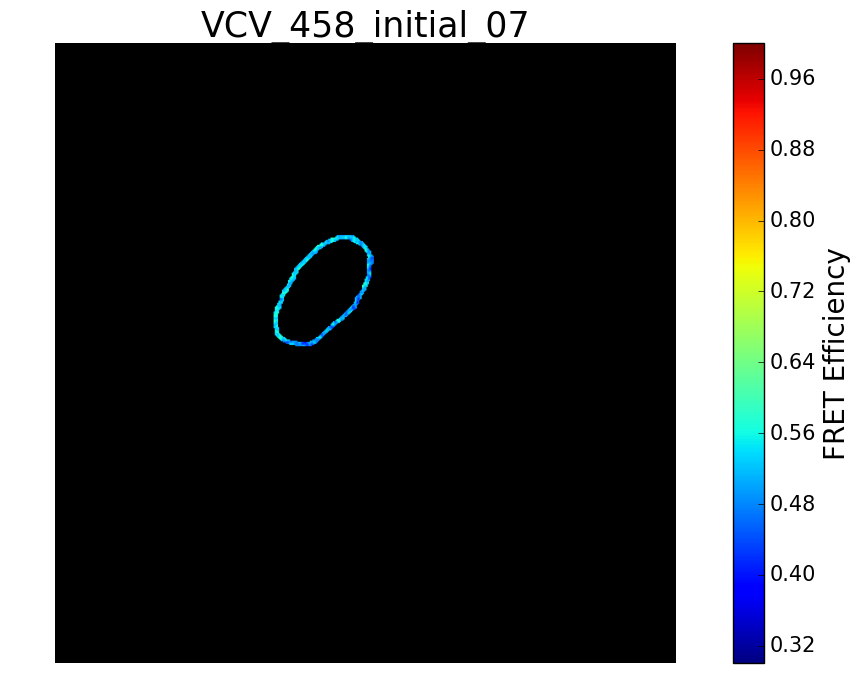

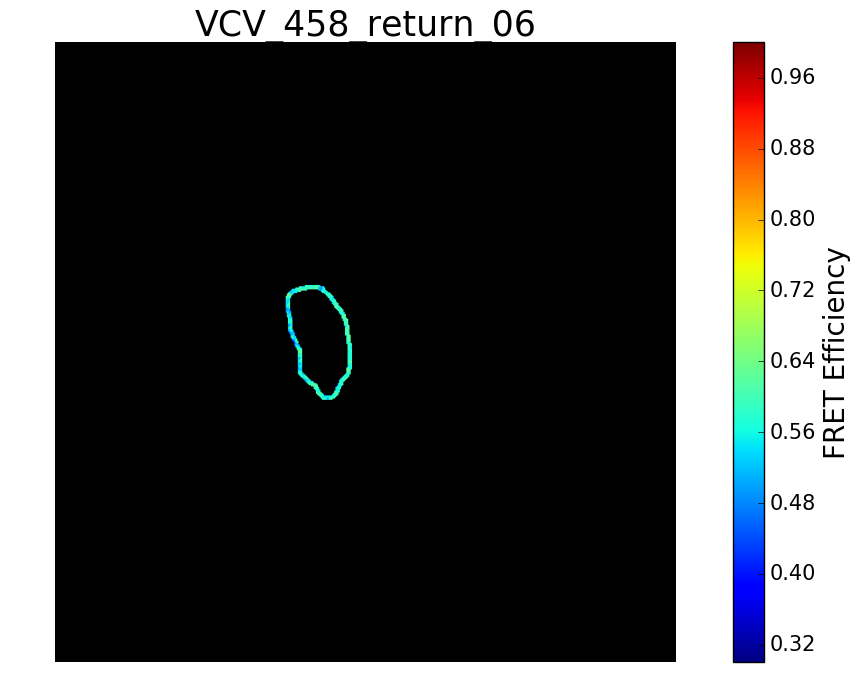

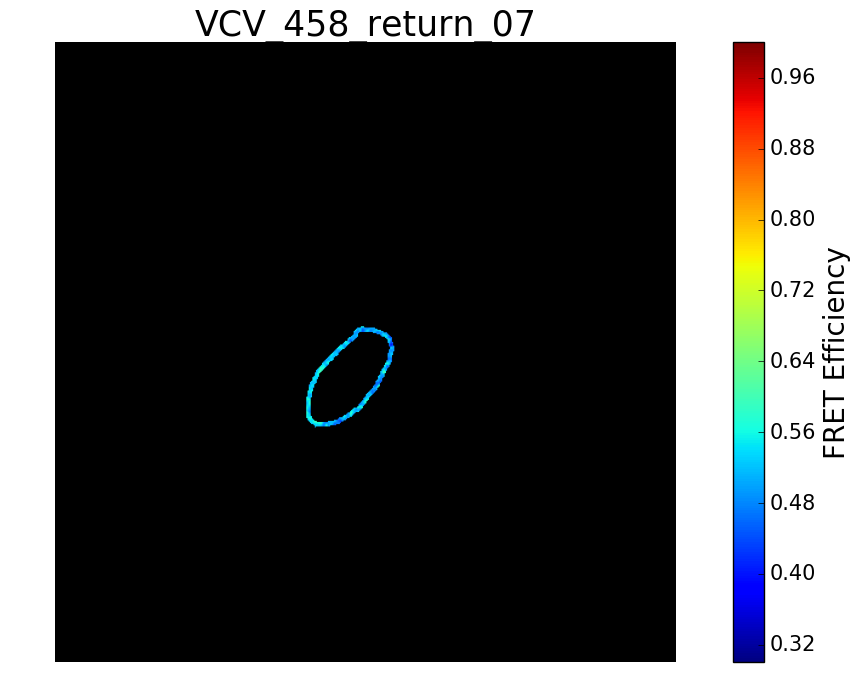

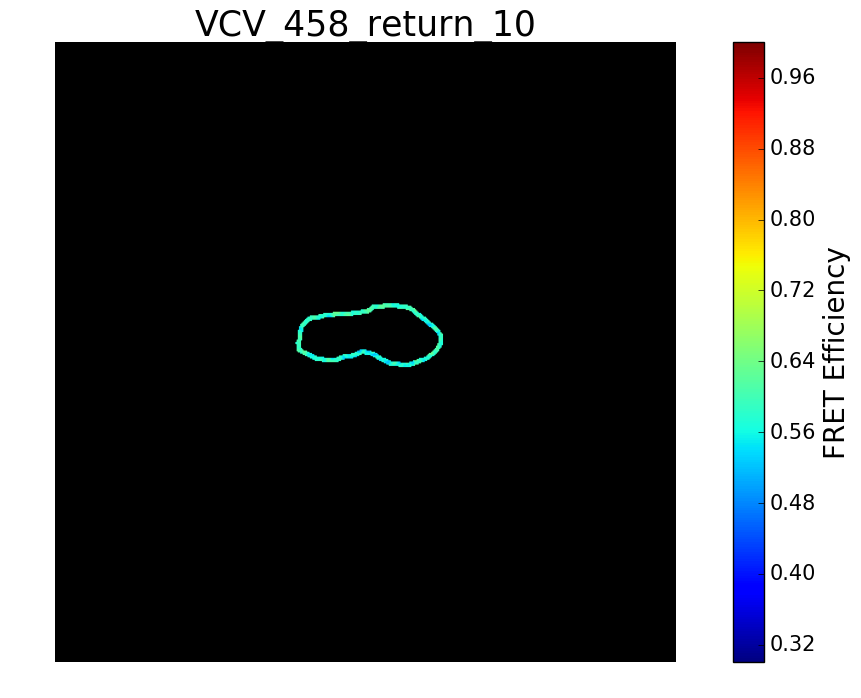

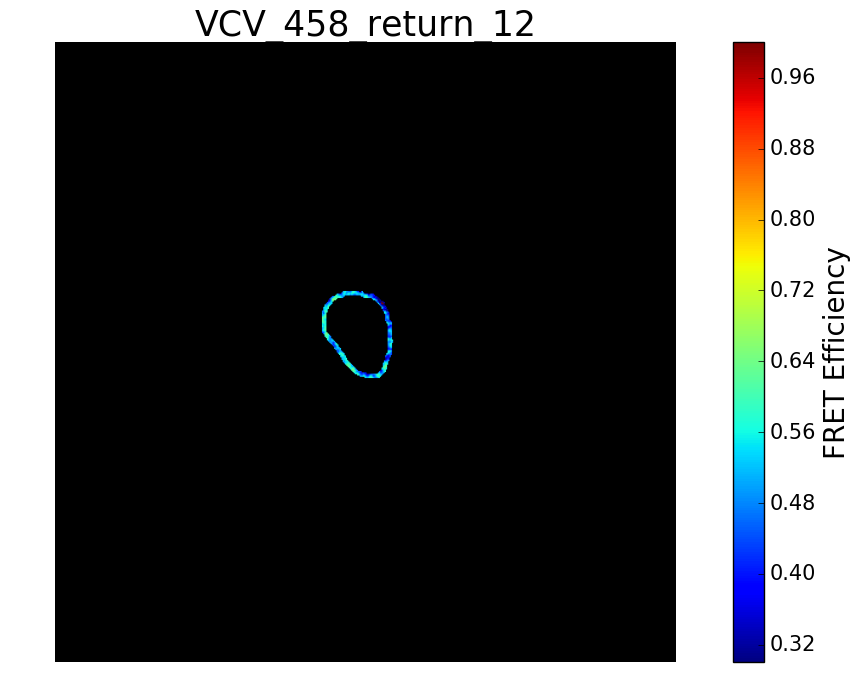

In [20]:
Data.plot_img(param='Eff',ex=2,mn=.3,mx=1,annotate=False,specify=[[],[],[]])


In [21]:
print(Data.alias)


{'A': 'Acceptor Magnitude', 'DtoA': 'Stoicheometry', 'Adir': 'Acceptor Direct Excitation', 'Eff_exA': 'FRET Efficiency (excess Acceptor)', 'D': 'Donor Magnitude', 'Err': 'FRET Efficiency Error', 'AF': 'Autofluorescence Magnitude', 'I': 'Intensity', 'Aex': 'Relative Acceptor Extinction Coef.', 'Dex': 'Relative Donor Extinction Coef.', 'F': 'Force (pN)', 'Eff_exD': 'FRET Efficiency (excess Donor)', 'RD': 'Donor Ratio (D2/D1)', 'R': 'Normalized Residual', 'RA': 'Acceptor Ratio (A1/A2)', 'Ind': 'FRET Index', 'Eff': 'FRET Efficiency'}


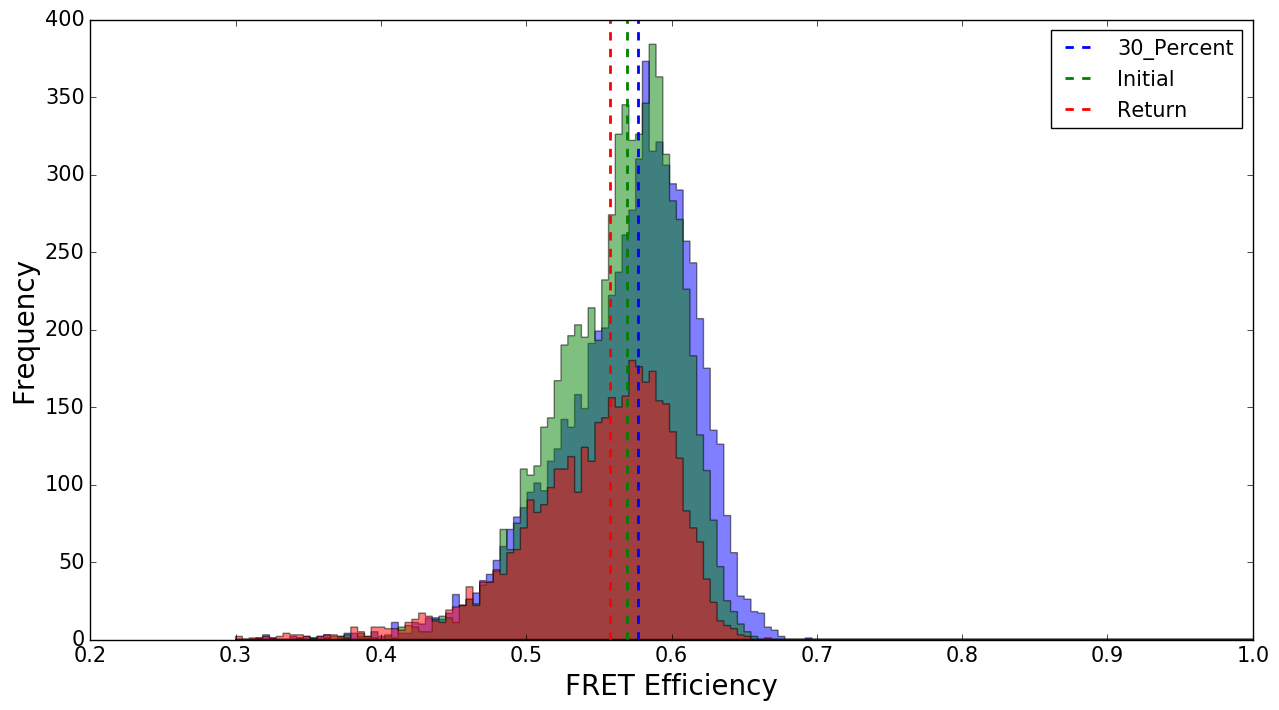

In [22]:
Data.hist_bygroup(param='Eff',ex=1,mn=.3,mx=1,bins=150,observation='pixel',specify=[[],[],[]])
#figure()
#Data.hist_byimage(param='Eff',ex=1,mn=.2,mx=.8,bins=150,observation='region',specify=[[1],[],[]])
#figure()
#Data.hist_byimage(param='Eff',ex=1,mn=.2,mx=.8,bins=150,observation='region',specify=[[2],[],[]])
#figure()
#Data.hist_byimage(param='Eff',ex=1,mn=.2,mx=.8,bins=150,observation='region',specify=[[3],[],[]])


In [23]:
Data.scatter_byimage??

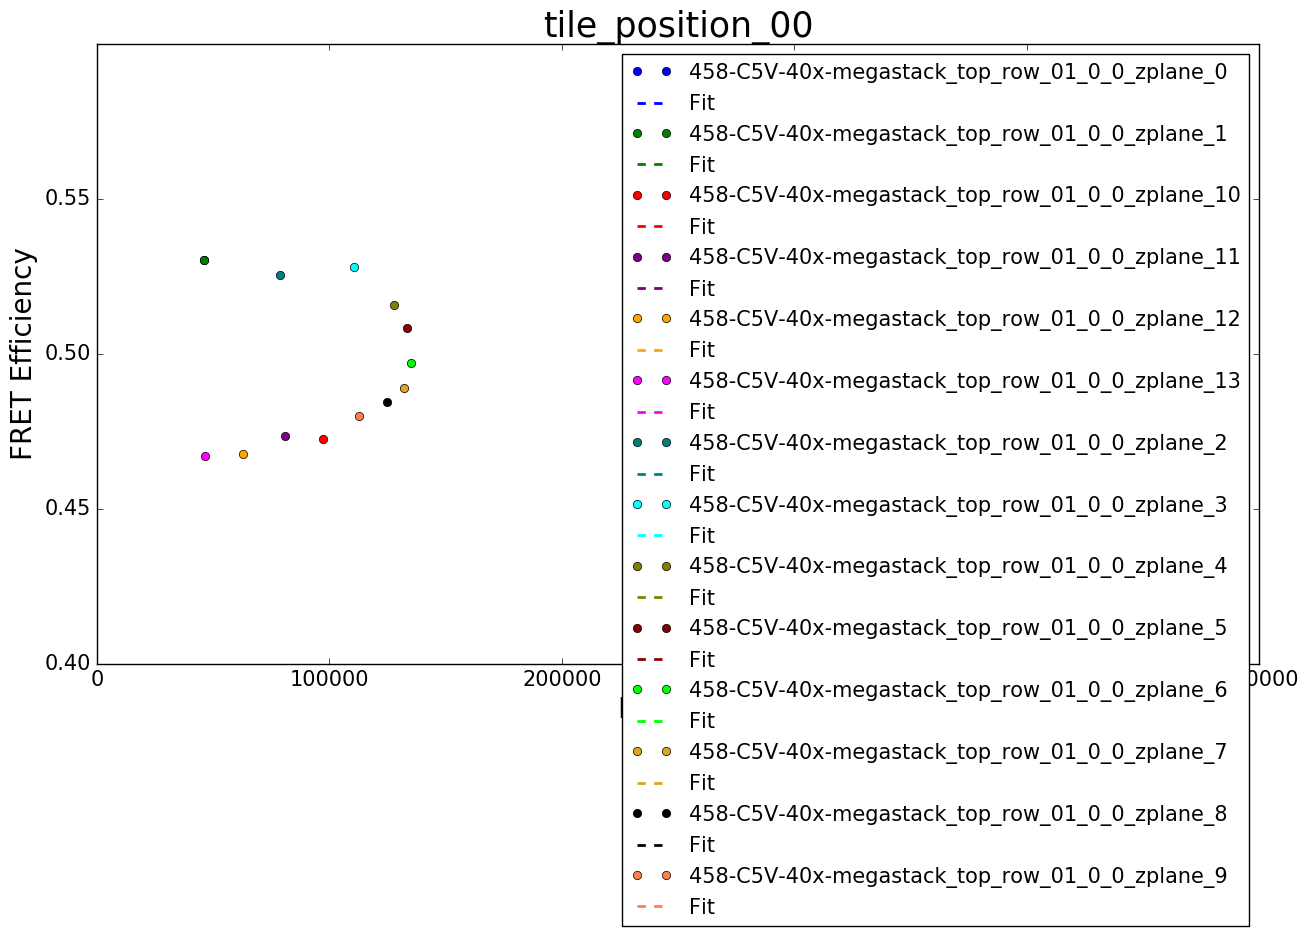

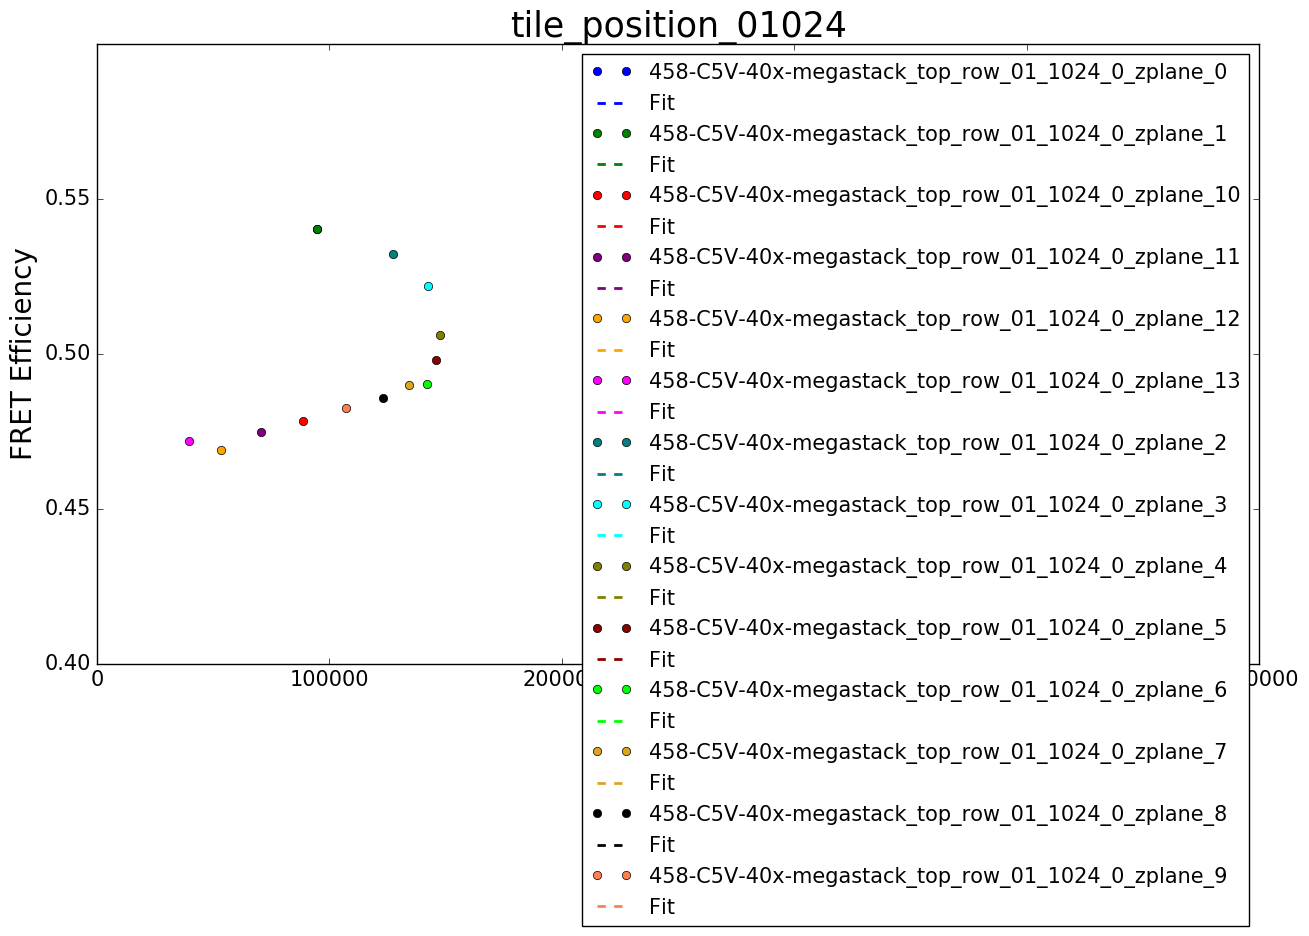

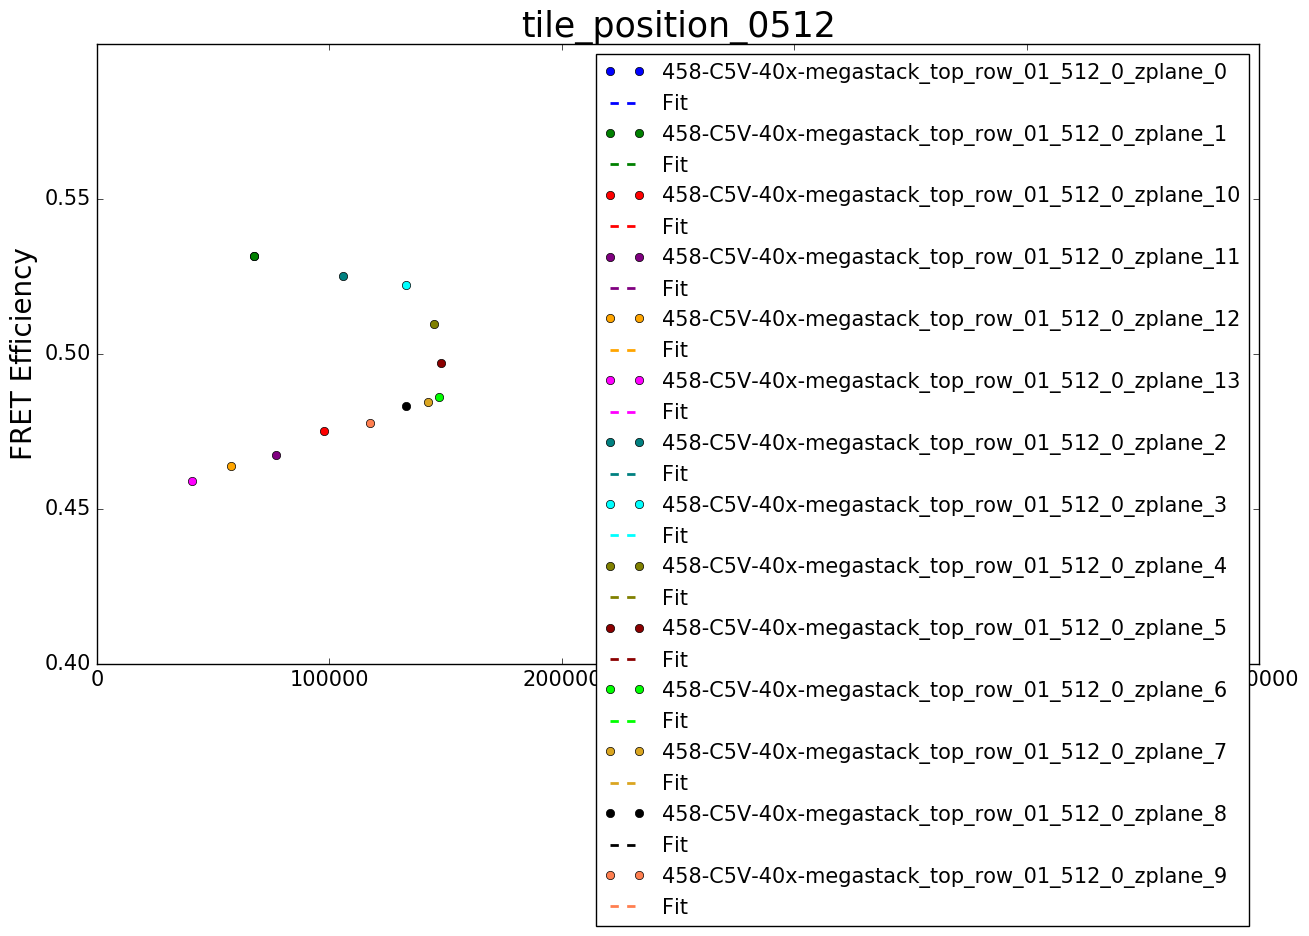

In [28]:
Data.scatter_byimage(param_x='Intensity', ex_x=2, param_y='FRET Efficiency', ex_y=2, y_range=[.4, .6], x_range=[0, 5e5], observation='image', specify=[[], [], []], alpha=1, fit=True, print_fit=False, annotate=False)

Data.hist_byimage(param='Eff',ex=1,mn=.3,mx=.6,bins=150,observation='region',specify=[[5],[0,8,10,12,14,2,4,6],[]])
figure()
Data.hist_byimage(param='Eff',ex=1,mn=.2,mx=.8,bins=150,observation='region',specify=[[6],[0,8,10,12,14,2,4,6],[]])

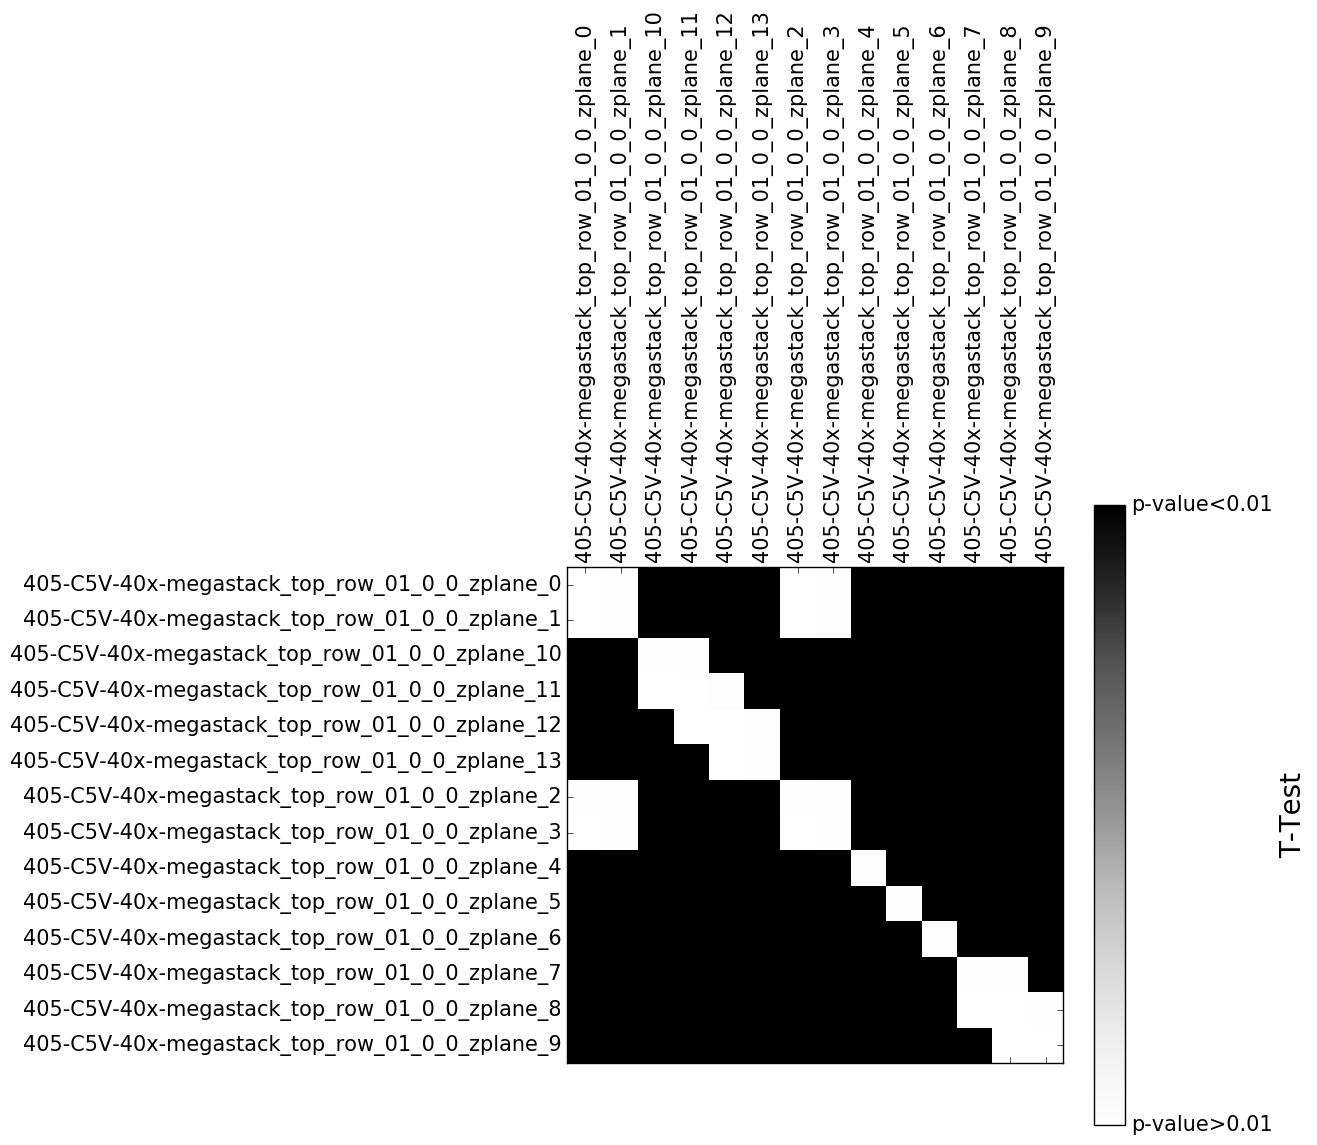

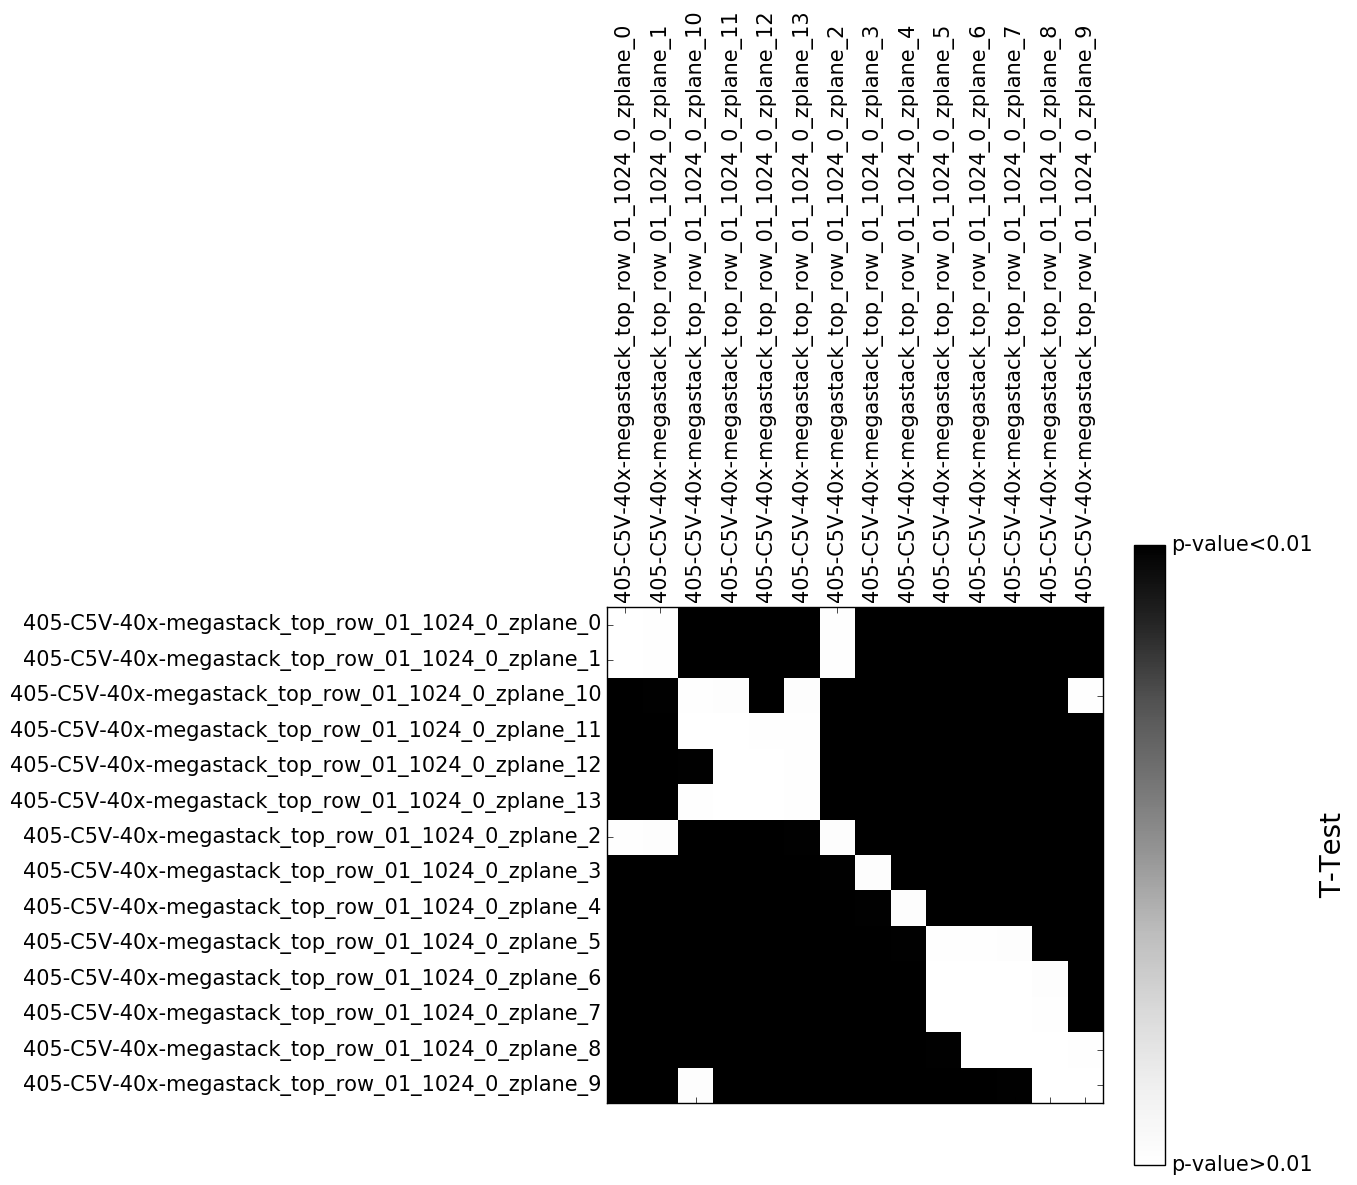

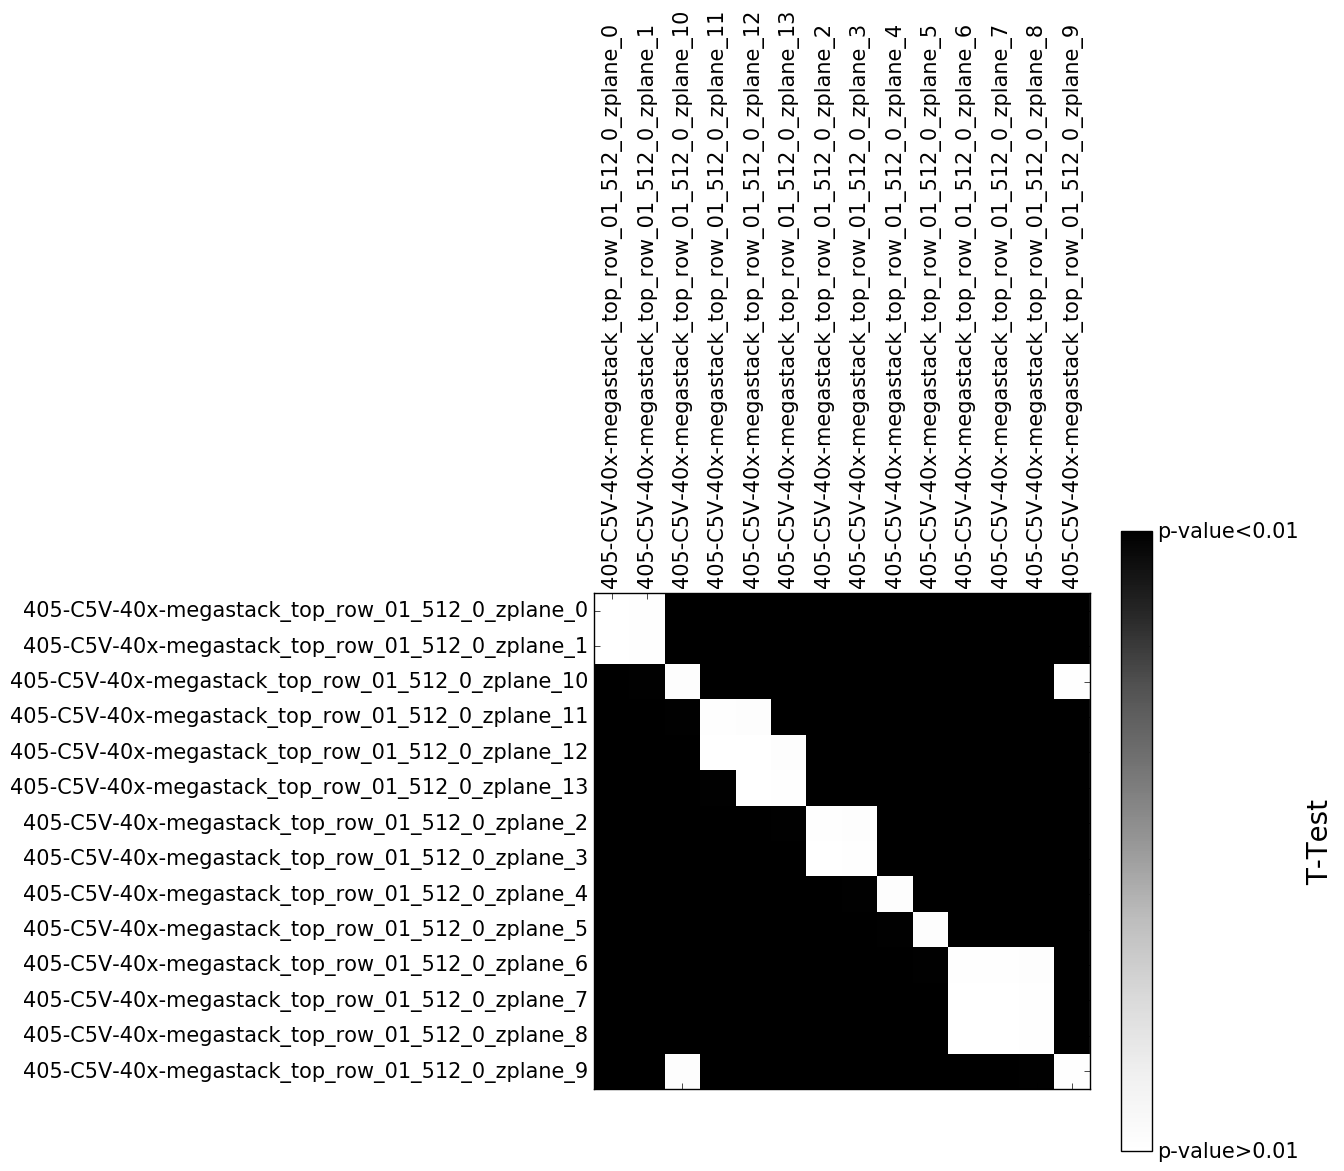

In [30]:
Data.significance_byimage(param='Eff',ex=1,test='T-Test',observation='region',thres=.01,specify=[[],[],[]])

In [ ]:
Data.CI_bygroup(param_y='Eff',param_x='I',ex_x=2,ex_y=2,y_range=[.4,.8],x_range=[0,6e5],
                xbins=50,ybins=30,p_val=.95,alpha=.01,specify=[[],[],[]])
legend(loc=4)
#twinx()
#Data.hist_bygroup(param='I',ex=2,mn=0,mx=6e5,bins=50,observation='pixel',specify=[[],[],[]],alpha=.25)
figure()
Data.CI_bygroup(param_y='Eff_exD',param_x='I',ex_x=2,ex_y=2,y_range=[0,1],x_range=[0,6e5],
                xbins=50,ybins=30,p_val=.95,alpha=.01,specify=[[4,5],[],[]])

## FRET Efficiency vs Intensity

Ideally the FRET Efficiency should be independent of the Intensity (and therefore have a slope of zero). Intermolecular FRET is concentration dependent and therefore will cause increasing FRET efficiency with increasing Intensity (a positive slope).  Noise causes the average FRET efficiency to bias towards 0.5 FRET at low intensity. Thresholding low amplitude pixels or increased blurring can help to reduce this. Pixel saturation will also affect the measured FRET efficiency at high Intensities, but the direction of the bias will depend on the emission shape of the fluorophore and how much of the spectra is clipped.

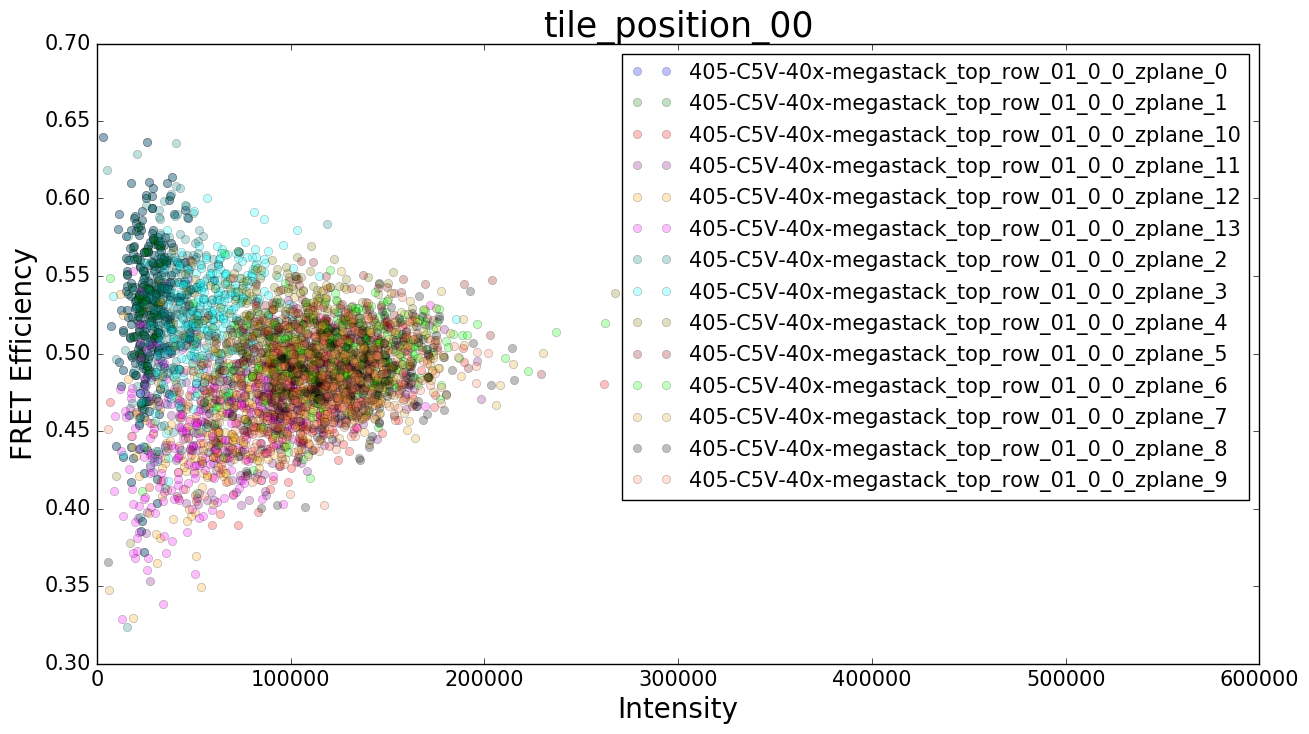

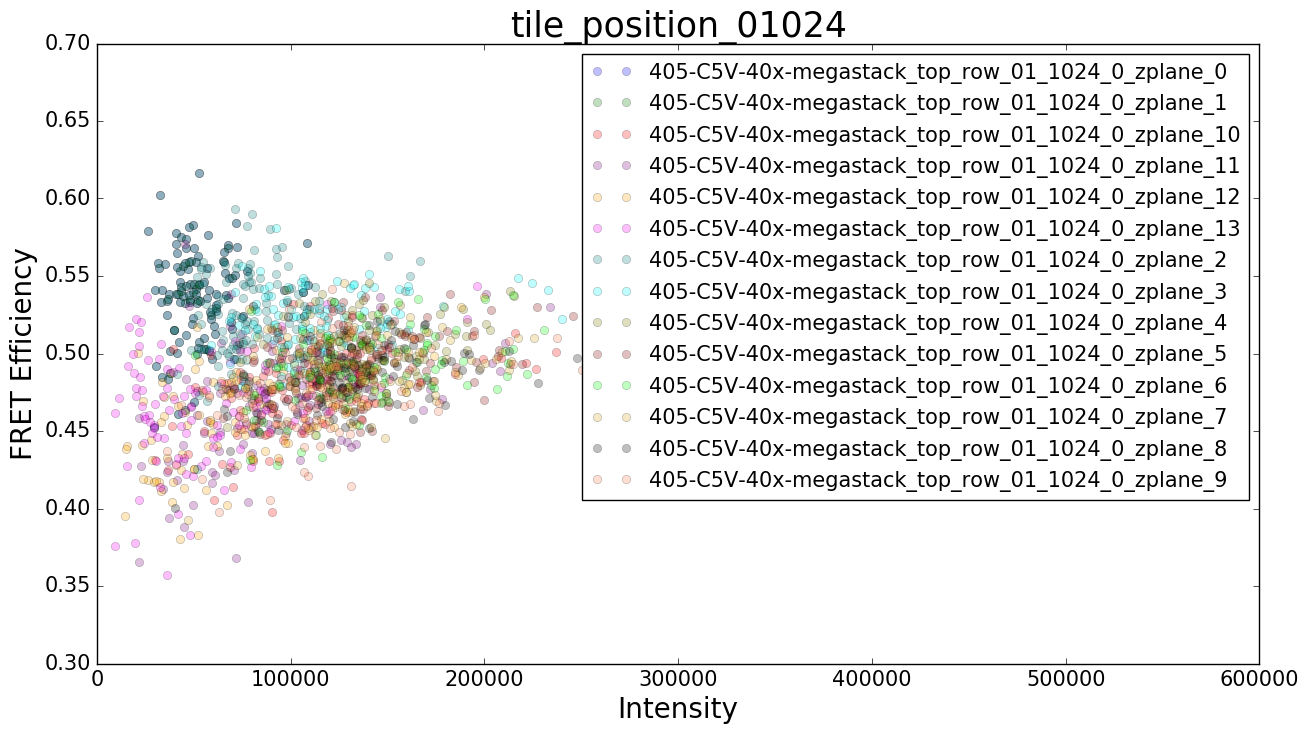

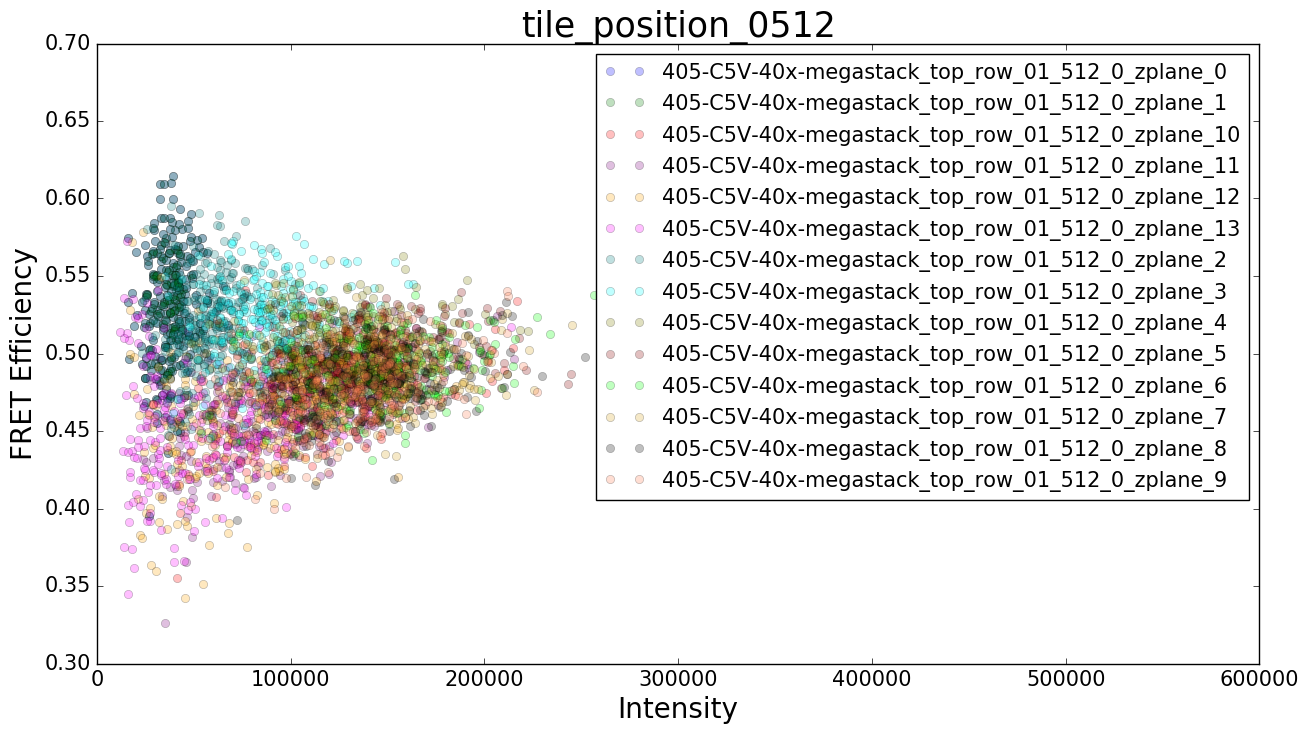

In [31]:
Data.scatter_byimage(param_y='Eff',param_x='Intensity',ex_x=1,ex_y=1,y_range=[.3,.7],x_range=[0,6e5],
                     annotate=False,observation='region',alpha=.25,print_fit=False,fit=False,specify=[[0],[],[]])
figure()
Data.scatter_byimage(param_y='Eff',param_x='Intensity',ex_x=1,ex_y=1,y_range=[.3,.7],x_range=[0,6e5],
                     annotate=False,observation='region',alpha=.25,print_fit=False,fit=False,specify=[[1],[],[]])
figure()
Data.scatter_byimage(param_y='Eff',param_x='Intensity',ex_x=1,ex_y=1,y_range=[.3,.7],x_range=[0,6e5],
                     annotate=False,observation='region',alpha=.25,print_fit=False,fit=False,specify=[[2],[],[]])


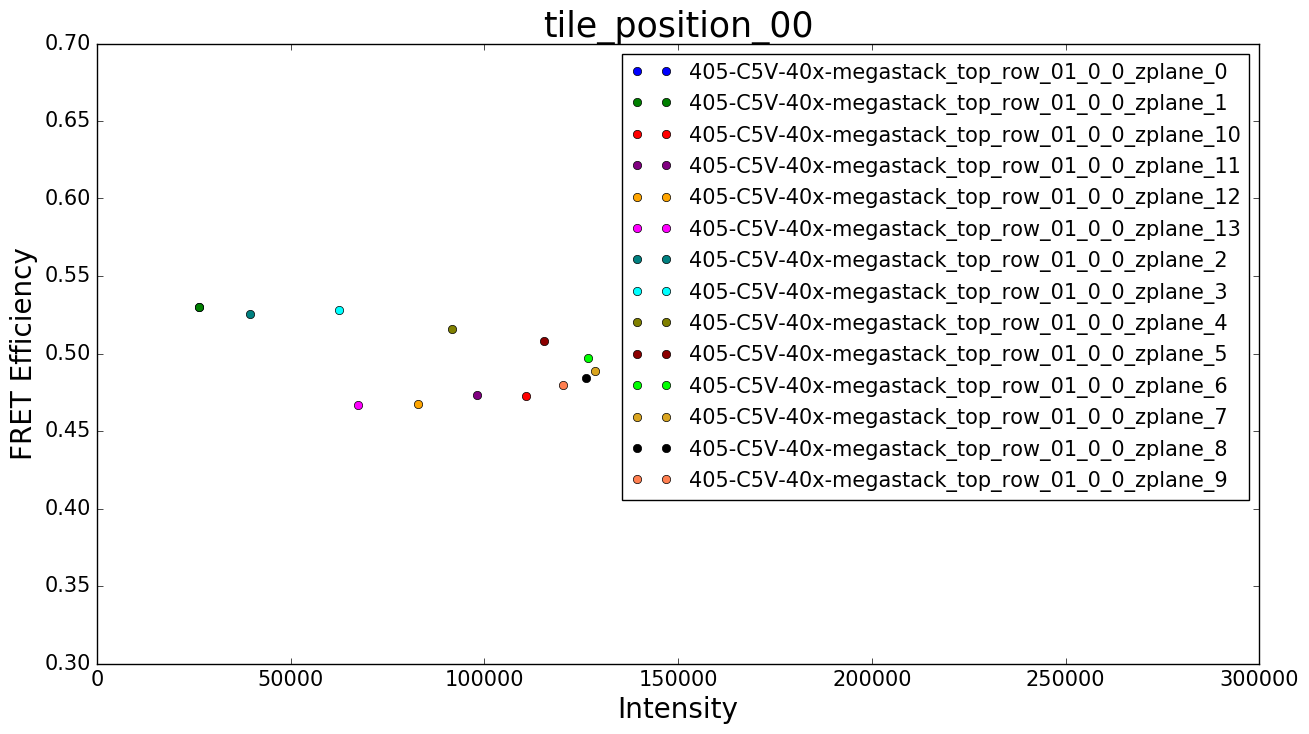

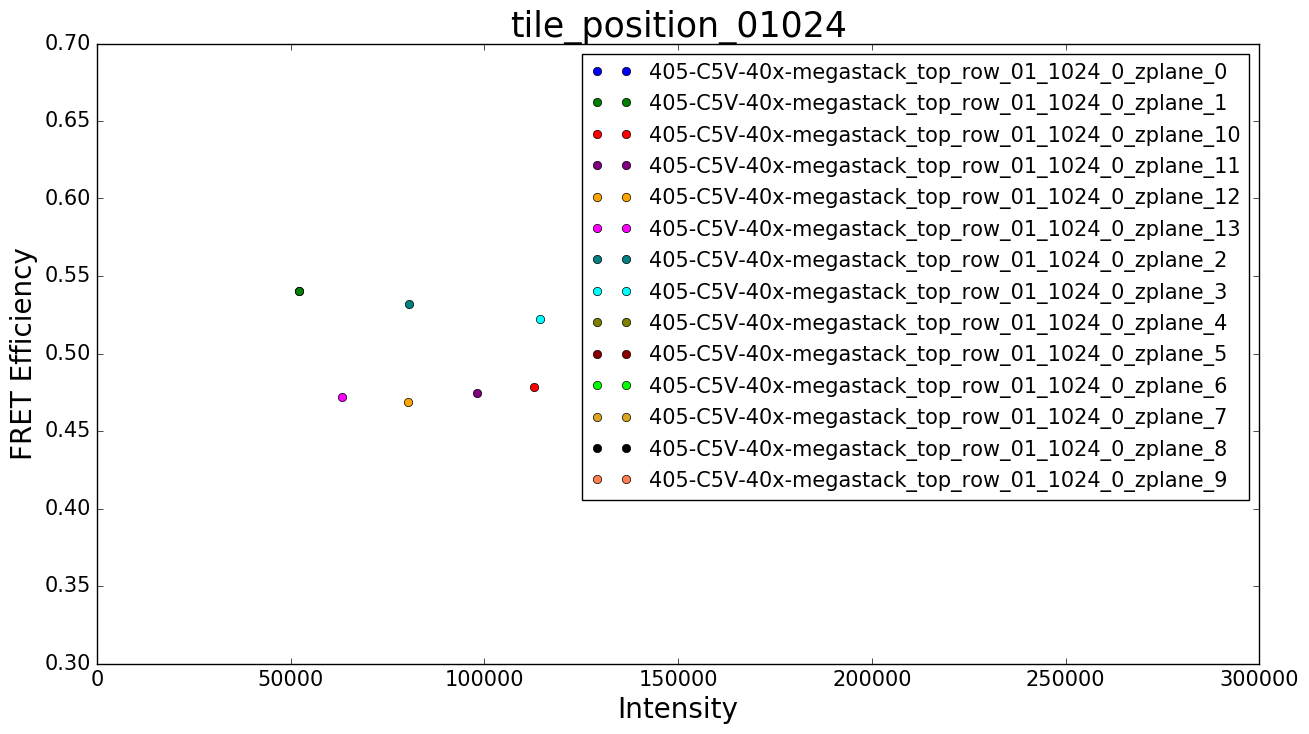

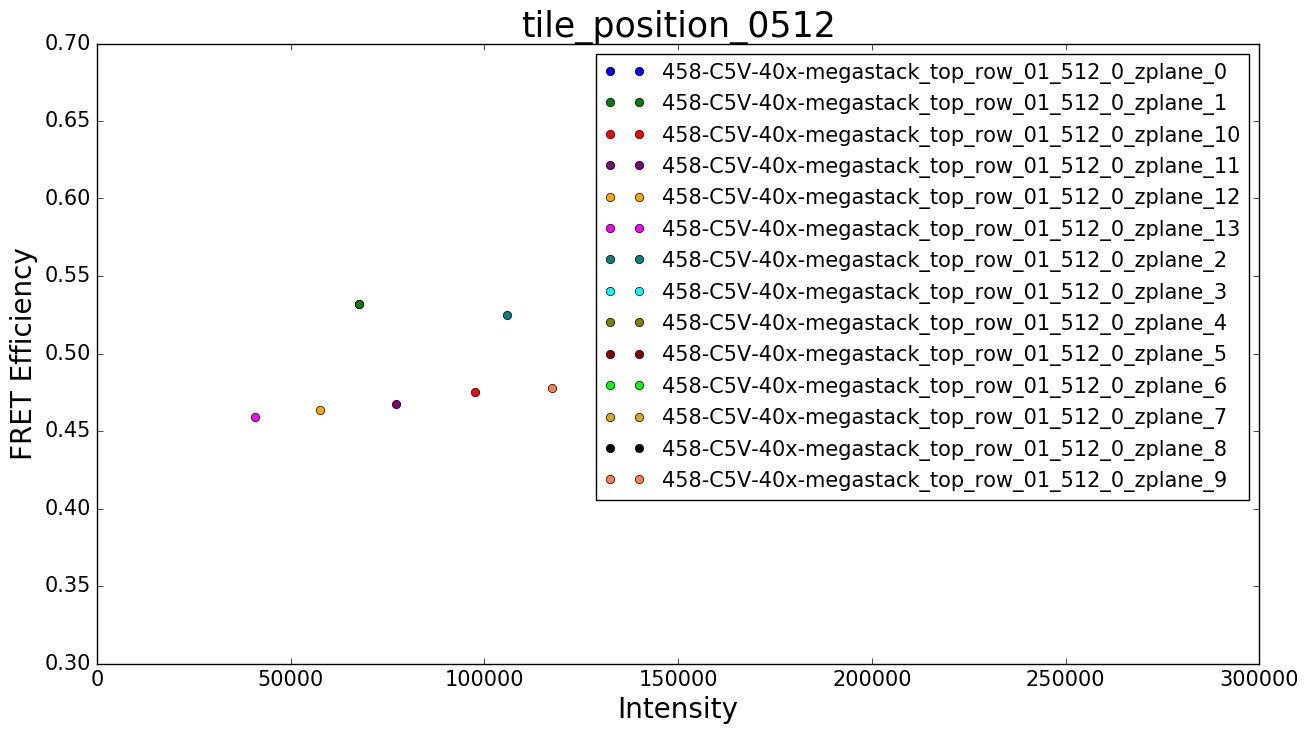

In [34]:
Data.scatter_byimage(param_y='Eff',param_x='Intensity',ex_x=1,ex_y=1,y_range=[.3,.7],x_range=[0,3e5],
                     annotate=False,observation='image',alpha=1,print_fit=False,fit=False,specify=[[0],[],[]])
Data.scatter_byimage(param_y='Eff',param_x='Intensity',ex_x=1,ex_y=1,y_range=[.3,.7],x_range=[0,3e5],
                     annotate=False,observation='image',alpha=1,print_fit=False,fit=False,specify=[[1],[],[]])
Data.scatter_byimage(param_y='Eff',param_x='Intensity',ex_x=2,ex_y=2,y_range=[.3,.7],x_range=[0,3e5],
                     annotate=False,observation='image',alpha=1,print_fit=False,fit=False,specify=[[2],[],[]])



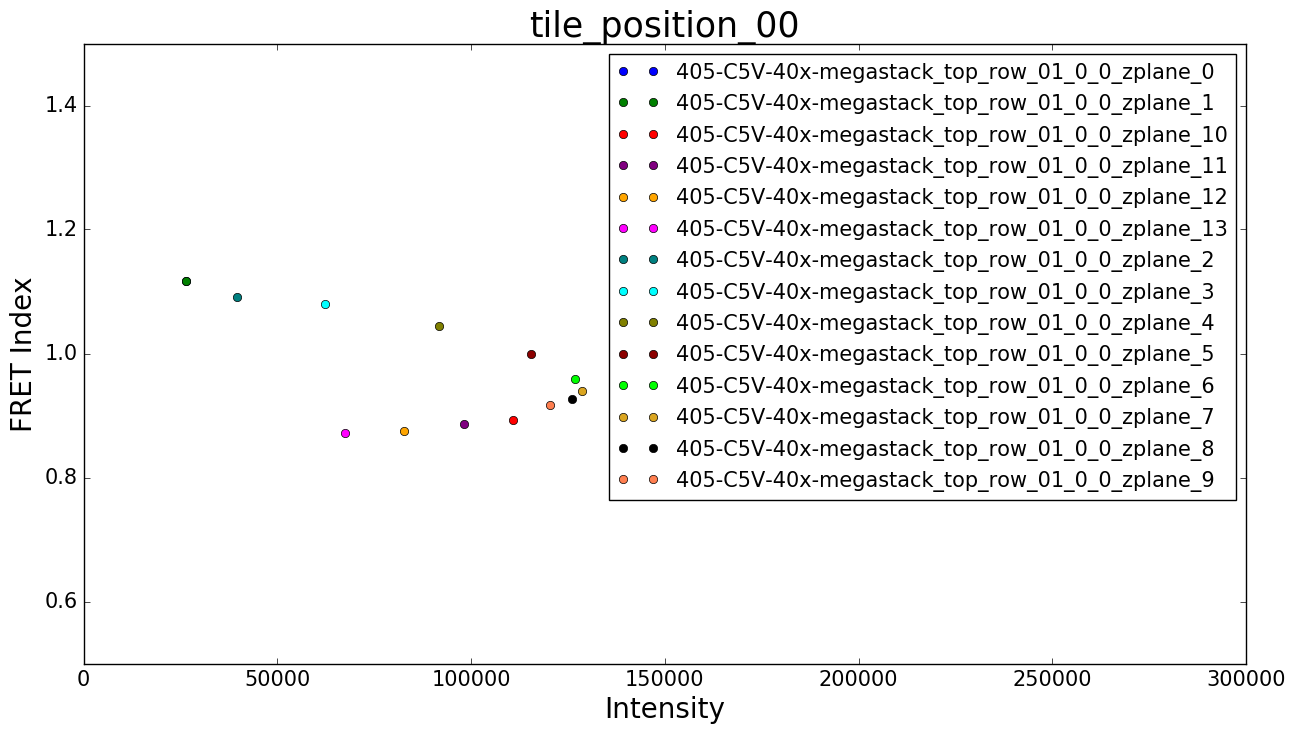

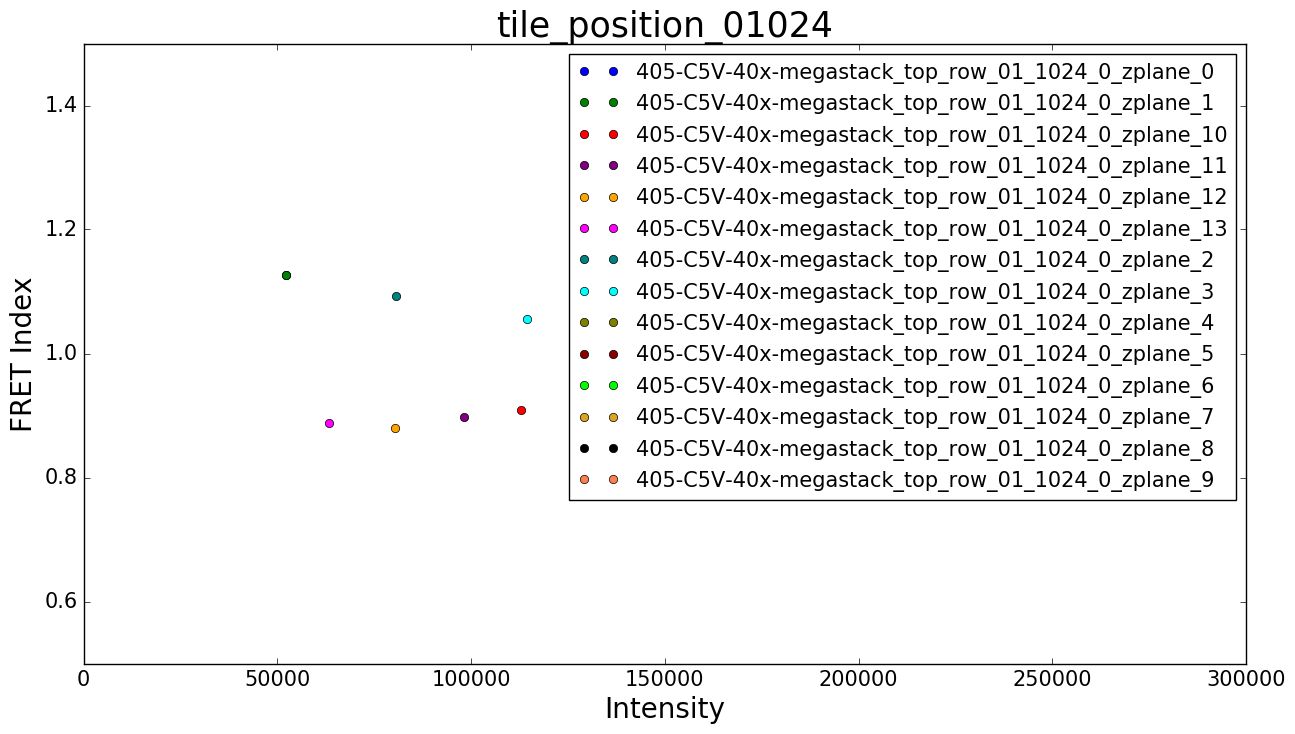

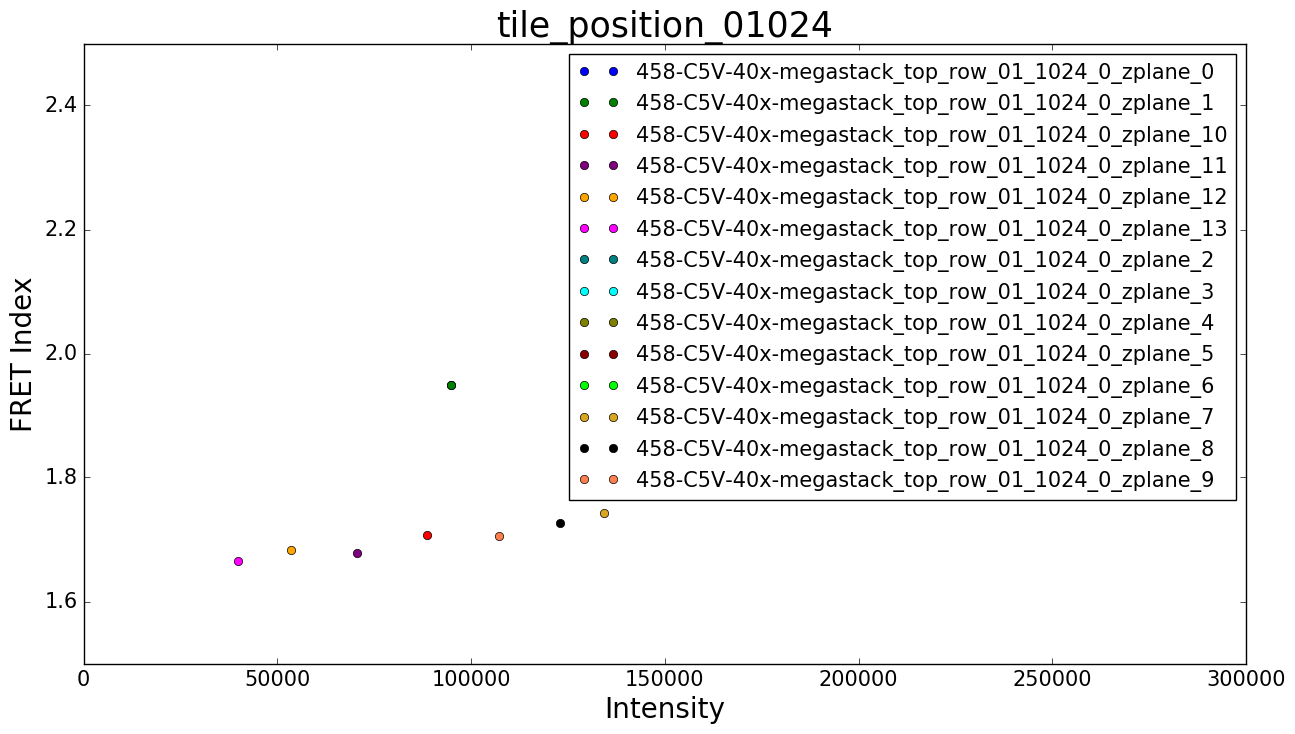

In [38]:
Data.scatter_byimage(param_y='Ind',param_x='Intensity',ex_x=1,ex_y=1,y_range=[.5,1.5],x_range=[0,3e5],
                     annotate=False,observation='image',alpha=1,print_fit=False,fit=False,specify=[[0],[],[]])
Data.scatter_byimage(param_y='Ind',param_x='Intensity',ex_x=1,ex_y=1,y_range=[.5,1.5],x_range=[0,3e5],
                     annotate=False,observation='image',alpha=1,print_fit=False,fit=False,specify=[[1],[],[]])
Data.scatter_byimage(param_y='Ind',param_x='Intensity',ex_x=2,ex_y=2,y_range=[1.5,2.5],x_range=[0,3e5],
                     annotate=False,observation='image',alpha=1,print_fit=False,fit=False,specify=[[1],[],[]])




In [ ]:
Data.scatter_bygroup(param_y='Eff_exD',param_x='Intensity',ex_x=2,ex_y=2,y_range=[0,1],x_range=[0,6e5],
                     annotate=False,observation='region',alpha=.25,print_fit=False,fit=False,specify=[[4,5],[],[]])

In [ ]:
Data.scatter_bygroup(param_y='Eff_exD',param_x='Intensity',ex_x=2,ex_y=2,y_range=[0,1],x_range=[0,6e5],
                     annotate=False,observation='region',alpha=.2,print_fit=False,fit=False,specify=[[2,3],[],[]])
figure()
Data.scatter_bygroup(param_y='Eff_exA',param_x='Intensity',ex_x=2,ex_y=2,y_range=[0,1],x_range=[0,6e5],
                     annotate=False,observation='region',alpha=.2,print_fit=False,fit=False,specify=[[2,3],[],[]])




In [ ]:
Data.scatter_bygroup(param_y='Eff_exD',param_x='Intensity',ex_x=2,ex_y=2,y_range=[0,1],x_range=[0,6e5],
                     annotate=False,observation='region',alpha=.25,print_fit=False,fit=False,specify=[[2,0,1,3],[],[]])
figure()
Data.scatter_bygroup(param_y='Eff_exA',param_x='Intensity',ex_x=2,ex_y=2,y_range=[0,1],x_range=[0,6e5],
                     annotate=False,observation='region',alpha=.25,print_fit=False,fit=False,specify=[[2,0,1,3],[],[]])



tile_position_00405-C5V-40x-megastack_top_row_01_0_0_zplane_0
Fit Slope=0.036
Fit Intercept=142.914
Fit R^2=0.382
Fit P-Value=0.000
tile_position_00405-C5V-40x-megastack_top_row_01_0_0_zplane_1
Fit Slope=0.036
Fit Intercept=142.914
Fit R^2=0.382
Fit P-Value=0.000
tile_position_00405-C5V-40x-megastack_top_row_01_0_0_zplane_10
Fit Slope=0.032
Fit Intercept=623.050
Fit R^2=0.650
Fit P-Value=0.000
tile_position_00405-C5V-40x-megastack_top_row_01_0_0_zplane_11
Fit Slope=0.034
Fit Intercept=259.786
Fit R^2=0.690
Fit P-Value=0.000
tile_position_00405-C5V-40x-megastack_top_row_01_0_0_zplane_12
Fit Slope=0.033
Fit Intercept=455.904
Fit R^2=0.747
Fit P-Value=0.000
tile_position_00405-C5V-40x-megastack_top_row_01_0_0_zplane_13
Fit Slope=0.033
Fit Intercept=415.459
Fit R^2=0.727
Fit P-Value=0.000
tile_position_00405-C5V-40x-megastack_top_row_01_0_0_zplane_2
Fit Slope=0.028
Fit Intercept=323.640
Fit R^2=0.439
Fit P-Value=0.000
tile_position_00405-C5V-40x-megastack_top_row_01_0_0_zplane_3
Fit Slope=

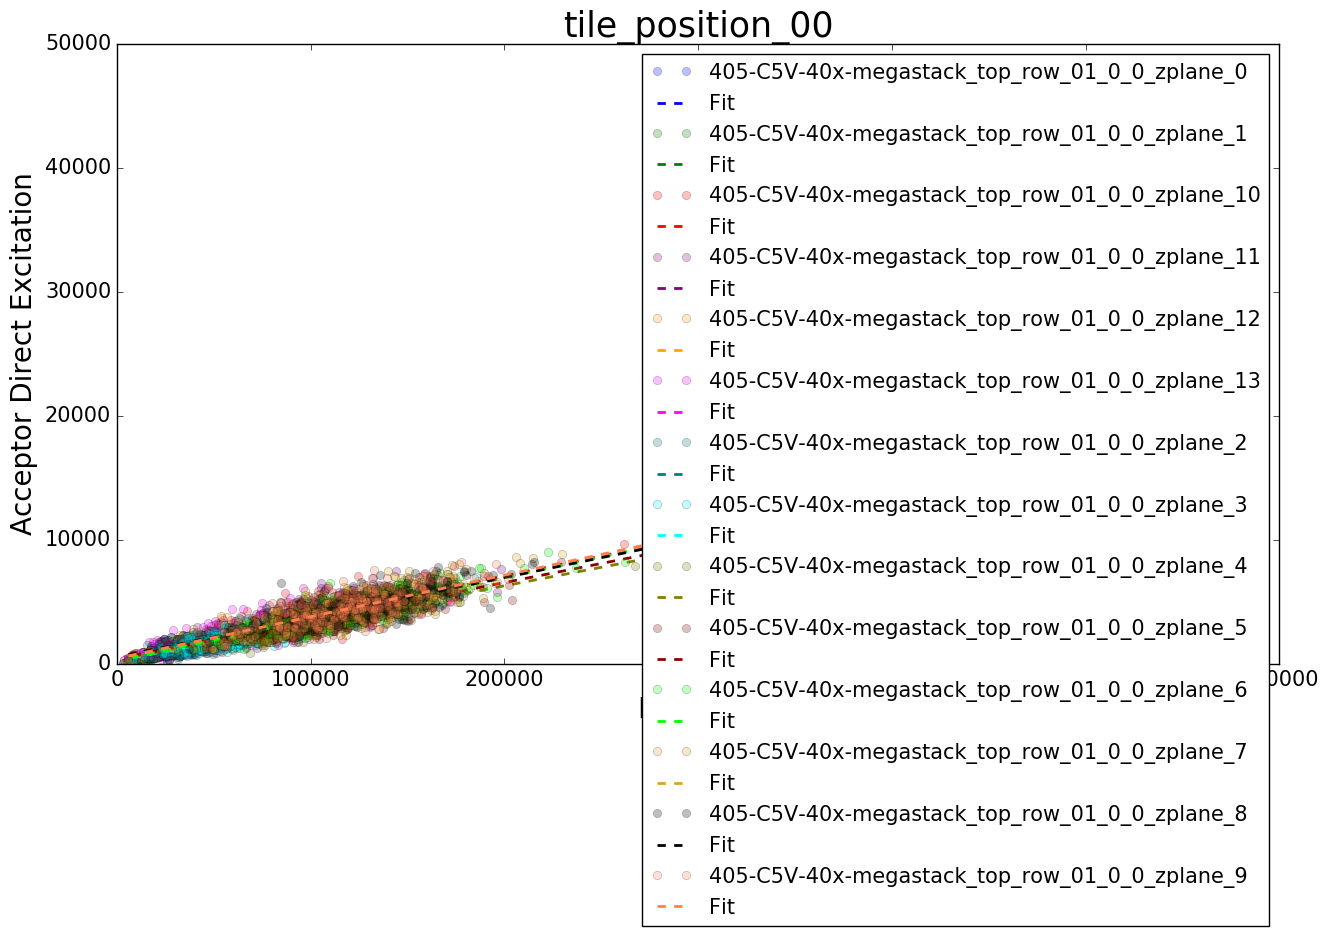

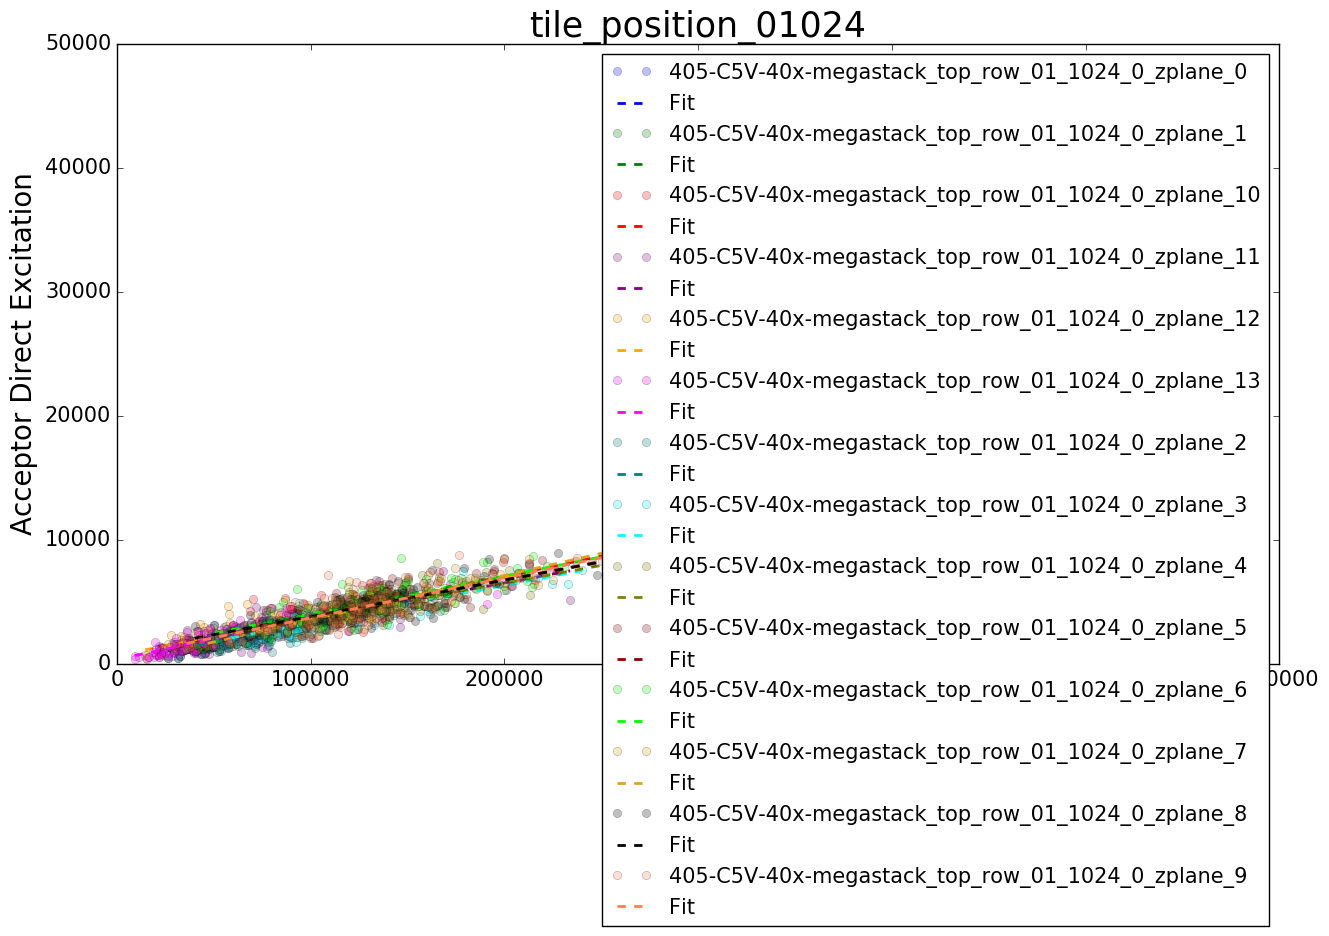

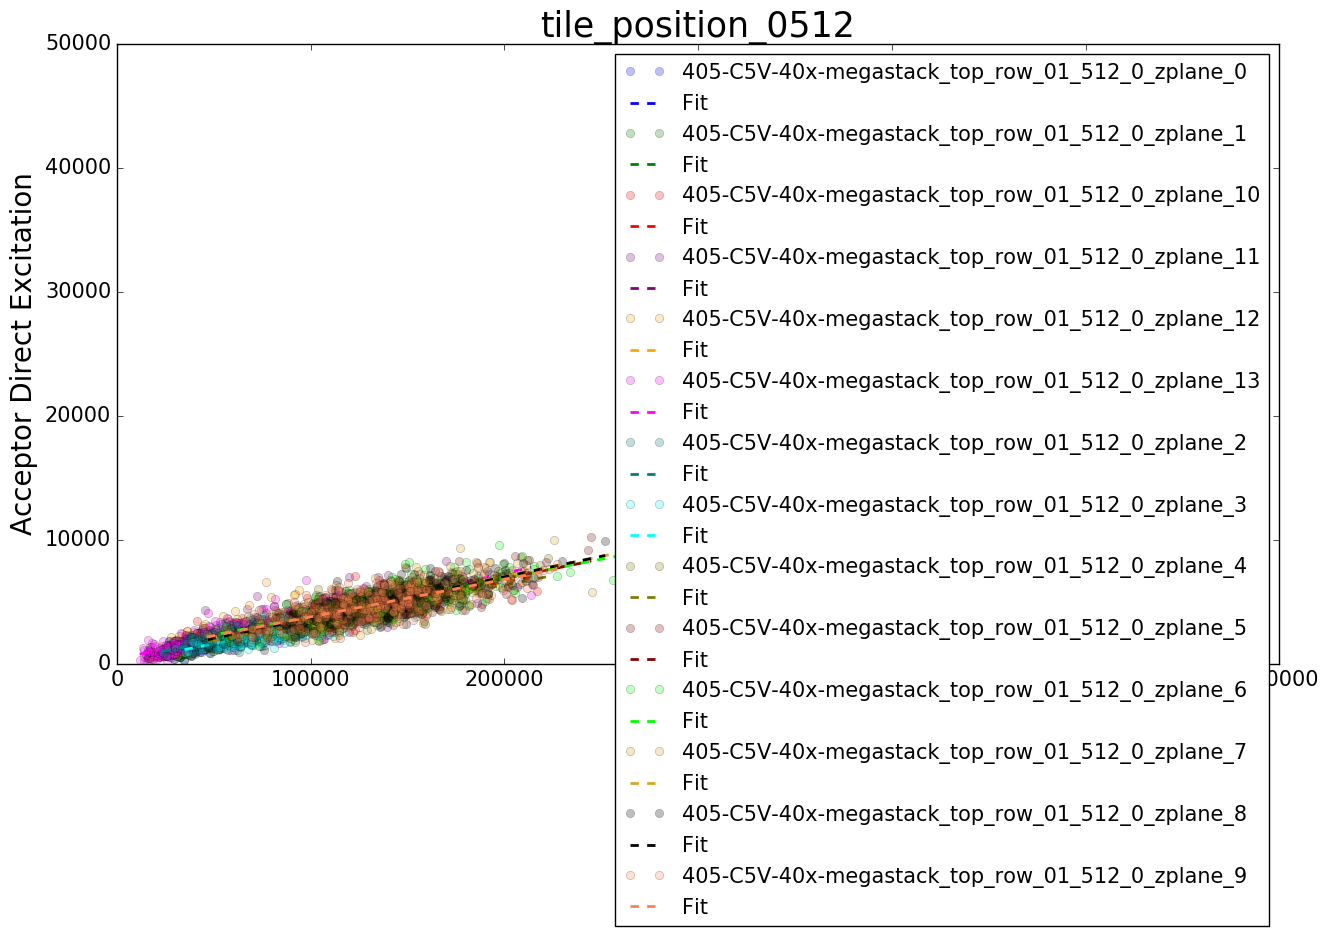

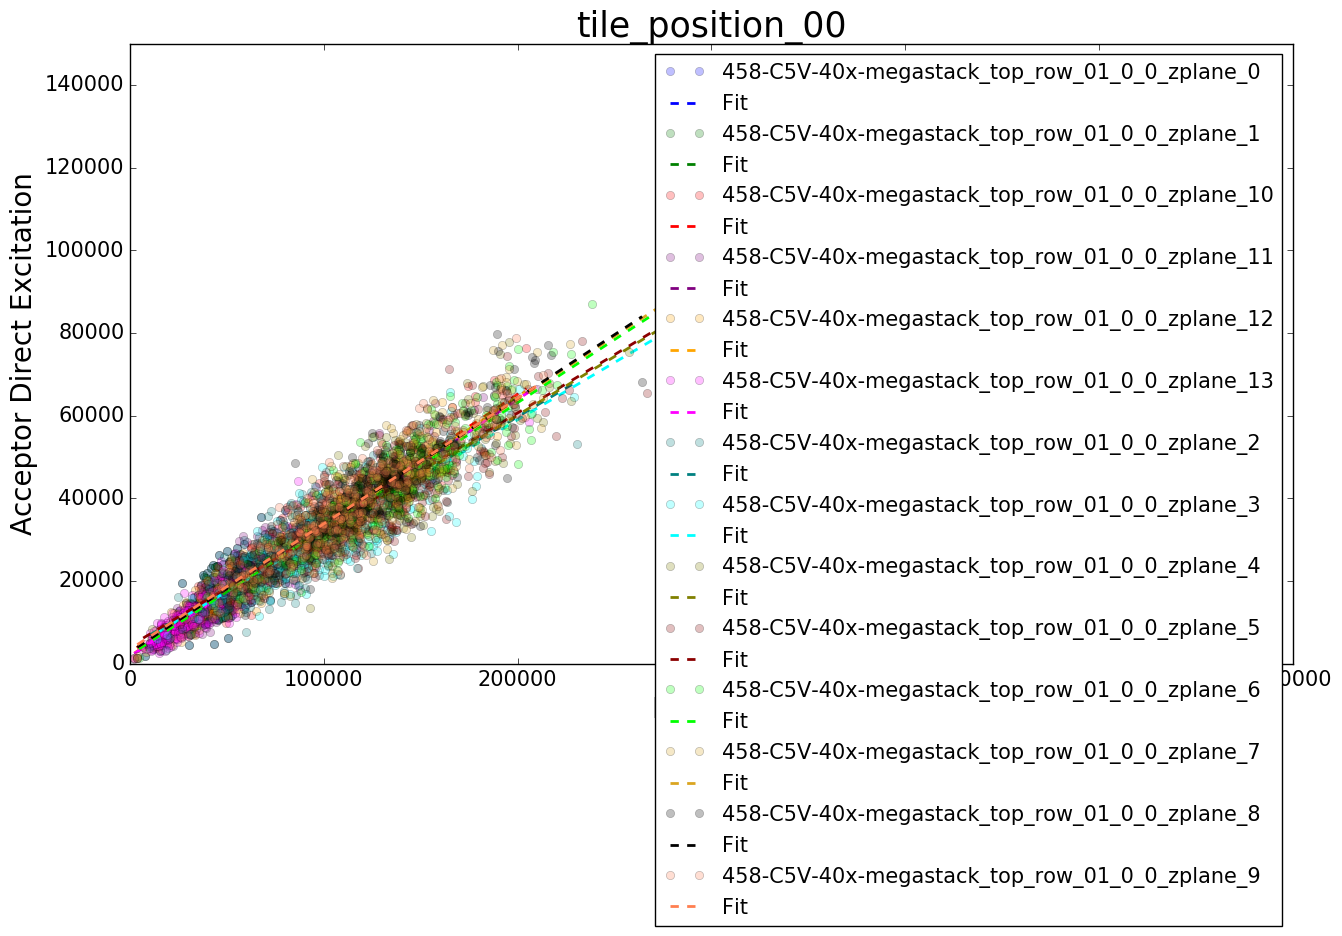

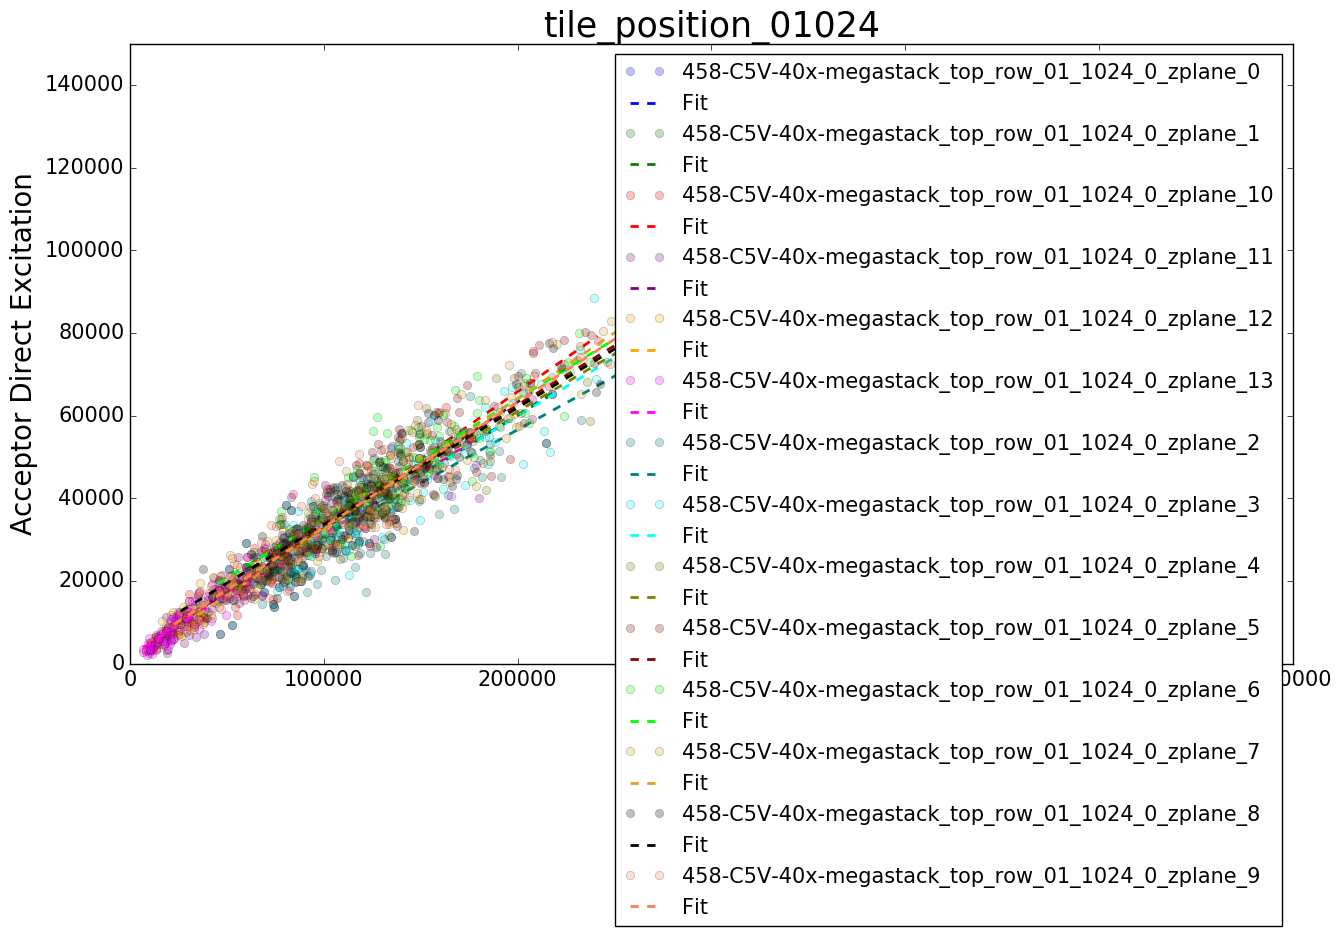

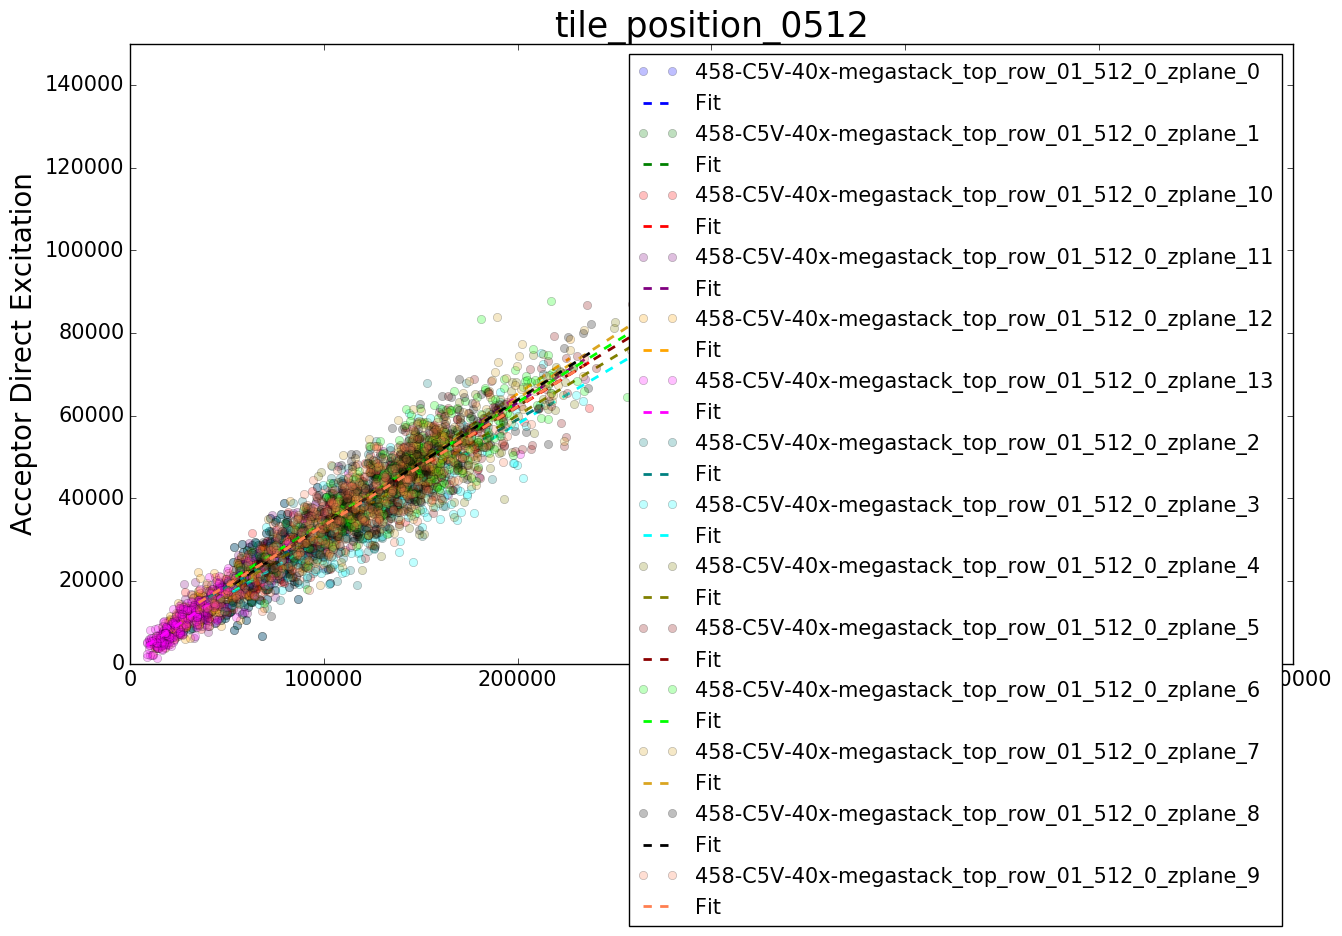

In [39]:
Data.scatter_byimage(param_y='Adir',param_x='Intensity',ex_x=1,ex_y=1,y_range=[0,.5e5],x_range=[0,6e5],
                     annotate=False,observation='region',alpha=.25,print_fit=True,fit=True,specify=[[],[],[]])
figure()
Data.scatter_byimage(param_y='Adir',param_x='Intensity',ex_x=2,ex_y=2,y_range=[0,1.5e5],x_range=[0,6e5],
                     annotate=False,observation='region',alpha=.25,print_fit=True,fit=True,specify=[[],[],[]])

## Direct Excitation vs Intensity

Ideally the Acceptor Direct Excitation should be linearly dependent on the Intensity and the slopes should be approximately the same between experimental groups. Slopes can change depending on bleaching. Lower slopes are indicative of unpaired Donor (which lowers the measured FRET Efficiency) and higher slopes are indicative of unpaired Acceptor (which does not affect the FRET Efficiency)

In [ ]:
Data.scatter_bygroup(param_y='Adir',param_x='I',ex_x=1,ex_y=1,y_range=[0,1e5],x_range=[0,6e5],
                     annotate=False,observation='region',alpha=.05,print_fit=False,specify=[[2,0,1,3],[],[]])
figure

Data.scatter_bygroup(param_y='Adir',param_x='I',ex_x=2,ex_y=2,y_range=[0,1e5],x_range=[0,6e5],
                     annotate=False,observation='region',alpha=.05,print_fit=False,specify=[[2,0,1,3],[],[]])



## Boxplot

The boxplot below compares each experimental group. The median FRET efficiency of each region is counted as a single observation. The overall median is shown in red, the IQR is shown as the extent of the box, the whiskers extend to the last datapoint within 1.5xIQR and any points outside the whiskers (outliers) are marked individually with crosshairs.

In [ ]:
Data.boxplot_byimage(param='Eff',ex=2,mn=.2,mx=.8,observation='region',specify=[[],[],[]])

## Significance Testing

Matricies are plotted showing whether or not pairings are considered statistically significant or not using a variety of statistical tests (the assumptions associated with each type of test are described elsewhere). Statistically significant pairings are marked as black (the matrix diagonal should always show no significance since its comparing identical groups).

In [ ]:
#Data.boxplot_byimage(param='Eff',ex=2,mn=.3,mx=.6,observation='region',specify=[[],[],[]])
Data.significance_byimage(param='Eff',ex=2,test='T-Test',observation='region',thres=.01,specify=[[],[],[]],print_pval=True)



In [ ]:
Data.export_xlsx(include_pix=False)


In [ ]:
Data.save()